In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# 1. Importation des données

### 1.1. Données démographiques

In [2]:
population_tab = pd.read_csv('Population_2000_2018.csv')

In [3]:
population_tab.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN


In [4]:
population_tab["Zone"].replace({'Norvège': 'Norvége'}, inplace=True)

In [5]:
population_tab["Zone"].replace({'Grèce': 'Gréce'}, inplace=True)

In [6]:
population2_tab = population_tab[['Zone', 'Année', 'Valeur']].copy()

In [7]:
population2_tab = population2_tab.rename(columns={"Valeur":"Population"})

In [8]:
population2_tab.head(3)

,Zone,Année,Population
0,Afghanistan,2000,20779.953
1,Afghanistan,2001,21606.988
2,Afghanistan,2002,22600.770


In [9]:
population2_tab.loc[(population2_tab['Zone'] == 'Grèce')]

,Zone,Année,Population


In [10]:
population2_tab.shape

(4411, 3)

In [11]:
population2_tab.dtypes

Zone           object
Année           int64
Population    float64
dtype: object

In [12]:
print(population2_tab.isnull().sum())

Zone          0
Année         0
Population    0
dtype: int64


In [13]:
population_2000 = population2_tab.loc[population2_tab['Année'] == 2000].reset_index(drop=True)

In [14]:
population_2000.head(3)

,Zone,Année,Population
0,Afghanistan,2000,20779.953
1,Afrique du Sud,2000,44967.708
2,Albanie,2000,3129.243


In [15]:
population_2018 = population2_tab.loc[population2_tab['Année'] == 2017].reset_index(drop=True)

In [16]:
population_2018.head(3)

,Zone,Année,Population
0,Afghanistan,2017,36296.113
1,Afrique du Sud,2017,57009.756
2,Albanie,2017,2884.169


In [17]:
population_increase_rate = population_2000.merge(population_2018, on = 'Zone', how='left')

In [18]:
population_increase_rate.head(3)

,Zone,Année_x,Population_x,Année_y,Population_y
0,Afghanistan,2000,20779.953,2017.0,36296.113
1,Afrique du Sud,2000,44967.708,2017.0,57009.756
2,Albanie,2000,3129.243,2017.0,2884.169


In [19]:
population_increase_rate['Increase rate (%)'] = round(((population_increase_rate['Population_y'] - population_increase_rate['Population_x'])/17)/((population_increase_rate['Population_y'] + population_increase_rate['Population_x'])/2)*100, 2)

In [20]:
population_increase_rate.head(3)

,Zone,Année_x,Population_x,Année_y,Population_y,Increase rate (%)
0,Afghanistan,2000,20779.953,2017.0,36296.113,3.20
1,Afrique du Sud,2000,44967.708,2017.0,57009.756,1.39
2,Albanie,2000,3129.243,2017.0,2884.169,-0.48


In [21]:
population_increase_rate = population_increase_rate.drop(columns=['Année_x', 'Population_x', 'Année_y'])

In [22]:
population_increase_rate.head(3)

,Zone,Population_y,Increase rate (%)
0,Afghanistan,36296.113,3.20
1,Afrique du Sud,57009.756,1.39
2,Albanie,2884.169,-0.48


In [23]:
urban_population = pd.read_csv('population_structure.csv')

In [24]:
urban_population.dtypes

Code Domaine               object
Domaine                    object
Code zone (FAO)             int64
Zone                       object
Code élement                int64
Population type            object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object

In [25]:
urban_population.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code élement,Population type,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sures,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,551,Population rurale,3010,Population-Estimations,2000,2000,1000 personnes,15657.474,X,Sources internationales sures,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,561,Population urbaine,3010,Population-Estimations,2000,2000,1000 personnes,4436.282,X,Sources internationales sures,"UNDESA, Population Division ? World Urbanizati..."


In [26]:
print(urban_population.isnull().sum())

Code Domaine                0
Domaine                     0
Code zone (FAO)             0
Zone                        0
Code élement                0
Population type             0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      883
dtype: int64


In [27]:
urban_population_2000 = urban_population.loc[(urban_population['Code élement'] == 561) & (urban_population['Année'] == 2000)]

In [28]:
urban_population_2000 = urban_population_2000[['Zone', 'Valeur']].copy()
urban_population_2000 = urban_population_2000.rename(columns={"Valeur":"urb pop 2000, mil"})

In [29]:
total_population_2000 = urban_population.loc[(urban_population['Code élement'] == 511) & (urban_population['Année'] == 2000)]

In [30]:
total_population_2000 = total_population_2000[['Zone', 'Valeur']].copy()
total_population_2000 = total_population_2000.rename(columns={"Valeur":"pop 2000, mil"})

In [31]:
urban_population_2018 = urban_population.loc[(urban_population['Code élement'] == 561) & (urban_population['Année'] == 2018)]

In [32]:
urban_population_2018 = urban_population_2018[['Zone', 'Valeur']].copy()
urban_population_2018 = urban_population_2018.rename(columns={"Valeur":"urb pop 2018, mil"})

In [33]:
total_population_2018 = urban_population.loc[(urban_population['Code élement'] == 511) & (urban_population['Année'] == 2018)]

In [34]:
total_population_2018 = total_population_2018[['Zone', 'Valeur']].copy()
total_population_2018 = total_population_2018.rename(columns={"Valeur":"pop 2018, mil"})

In [35]:
urban_population_dynamics = urban_population_2000.merge(total_population_2000, on = 'Zone', how='left')
urban_population_dynamics = urban_population_dynamics.merge(urban_population_2018, on = 'Zone', how='left')
urban_population_dynamics = urban_population_dynamics.merge(total_population_2018, on = 'Zone', how='left')

In [36]:
urban_population_dynamics.head(3)

,Zone,"urb pop 2000, mil","pop 2000, mil","urb pop 2018, mil","pop 2018, mil"
0,Afghanistan,4436.282,20779.953,9273.302,37171.921
1,Afrique du Sud,26015.136,44967.708,38086.769,57792.518
2,Albanie,1303.137,3129.243,1769.975,2882.740


In [37]:
urban_population_dynamics['urb pop 2000, %'] = urban_population_dynamics['urb pop 2000, mil'] / urban_population_dynamics['pop 2000, mil'] * 100

In [38]:
urban_population_dynamics['urb pop 2018, %'] = urban_population_dynamics['urb pop 2018, mil'] / urban_population_dynamics['pop 2018, mil'] * 100

In [39]:
urban_population_dynamics['urb pop change, %'] = urban_population_dynamics['urb pop 2018, %'] - urban_population_dynamics['urb pop 2000, %']

In [40]:
urban_population_dynamics = urban_population_dynamics.drop(columns=['urb pop 2000, mil', 'pop 2000, mil', 'urb pop 2018, mil', 'pop 2018, mil', 'urb pop 2000, %'])

In [41]:
urban_population_dynamics.head(3)

,Zone,"urb pop 2018, %","urb pop change, %"
0,Afghanistan,24.947062,3.598207
1,Afrique du Sud,65.902595,8.049666
2,Albanie,61.399051,19.755209


In [42]:
print(urban_population_dynamics.isnull().sum())

Zone                 0
urb pop 2018, %      2
urb pop change, %    3
dtype: int64


In [43]:
urban_population_dynamics = urban_population_dynamics.fillna(urban_population_dynamics.mean())

### 1.2. Disponibilite alimentaire en 2017

In [44]:
dispo_aliment_2017 = pd.read_csv('DisponibiliteAlimentaire_2017.csv')

In [45]:
dispo_aliment_2017.head(3)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées


In [46]:
dispo_aliment2017_tab = dispo_aliment_2017[['Zone', 'Élément', 'Produit', 'Valeur', 'Unité']].copy()

In [47]:
dispo_aliment2017_tab.head(3)

,Zone,Élément,Produit,Valeur,Unité
0,Afghanistan,Production,Blé et produits,4281.0,Milliers de tonnes
1,Afghanistan,Importations - Quantité,Blé et produits,2302.0,Milliers de tonnes
2,Afghanistan,Variation de stock,Blé et produits,-119.0,Milliers de tonnes


In [48]:
dispo_aliment2017_tab.dtypes

Zone        object
Élément     object
Produit     object
Valeur     float64
Unité       object
dtype: object

In [49]:
dispo_aliment2017_tab.shape

(176600, 5)

In [50]:
print(dispo_aliment2017_tab.isnull().sum())

Zone       0
Élément    0
Produit    0
Valeur     0
Unité      0
dtype: int64


In [51]:
product_aliment2017_tab = dispo_aliment2017_tab.loc[dispo_aliment2017_tab['Élément'] == 'Production']
product_aliment2017_tab = product_aliment2017_tab.reset_index(drop=True)
product_aliment2017_tab.head(3)

,Zone,Élément,Produit,Valeur,Unité
0,Afghanistan,Production,Blé et produits,4281.0,Milliers de tonnes
1,Afghanistan,Production,Riz et produits,338.0,Milliers de tonnes
2,Afghanistan,Production,Orge et produits,95.0,Milliers de tonnes


In [52]:
product_aliment_tab = product_aliment2017_tab.drop(columns=['Élément'])

In [53]:
product_aliment_tab.head(3)

,Zone,Produit,Valeur,Unité
0,Afghanistan,Blé et produits,4281.0,Milliers de tonnes
1,Afghanistan,Riz et produits,338.0,Milliers de tonnes
2,Afghanistan,Orge et produits,95.0,Milliers de tonnes


In [54]:
product_aliment_tab.shape

(10334, 4)

In [55]:
product_aliment2_tab = product_aliment_tab.loc[product_aliment_tab['Unité'] == 'Milliers de tonnes']
product_aliment2_tab = product_aliment2_tab.reset_index(drop=True)
product_aliment2_tab.head(3)

,Zone,Produit,Valeur,Unité
0,Afghanistan,Blé et produits,4281.0,Milliers de tonnes
1,Afghanistan,Riz et produits,338.0,Milliers de tonnes
2,Afghanistan,Orge et produits,95.0,Milliers de tonnes


In [56]:
product_aliment2_tab.shape

(10334, 4)

In [57]:
total_alim_production = product_aliment_tab.groupby('Zone').sum('Valeur').reset_index()

In [58]:
total_alim_production = total_alim_production.rename(columns={"Valeur":"Production (kt)"})

In [59]:
total_alim_production.head(3)

,Zone,Production (kt)
0,Afghanistan,11609.0
1,Afrique du Sud,68455.0
2,Albanie,4231.0


### 1.3. Sécurité et stabilité

In [60]:
security_stability_tab = pd.read_csv('security_stability.csv')

In [61]:
security_stability_tab.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code élément,élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,2033.8,X,Sources internationales s?res,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20002002,2000-2002,%,266.0,F,Estimation FAO,NaN
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20172019,2017-2019,%,305.0,F,Estimation FAO,NaN


In [62]:
pib_2018 = security_stability_tab.loc[(security_stability_tab['Code Produit'] == 22013) & (security_stability_tab['Année'] == '2018')]

In [63]:
pib_2018.reset_index(drop=True)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code élément,élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,2033.8,X,Sources internationales s?res,NaN
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,12627.9,X,Sources internationales s?res,NaN
2,FS,Données de la sécurité alimentaire,3,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,13323.8,X,Sources internationales s?res,NaN
3,FS,Données de la sécurité alimentaire,4,Algérie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,11642.2,X,Sources internationales s?res,NaN
4,FS,Données de la sécurité alimentaire,79,Allemagne,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,53463.4,X,Sources internationales s?res,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,FS,Données de la sécurité alimentaire,234,Uruguay,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,23035.1,X,Sources internationales s?res,NaN
183,FS,Données de la sécurité alimentaire,155,Vanuatu,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,3093.5,X,Sources internationales s?res,NaN
184,FS,Données de la sécurité alimentaire,237,Viet Nam,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,7585.9,X,Sources internationales s?res,NaN
185,FS,Données de la sécurité alimentaire,251,Zambie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2018,2018,I$,3521.5,X,Sources internationales s?res,NaN


In [64]:
pib_2018.dtypes

Code Domaine               object
Domaine                    object
Code zone (FAO)             int64
Zone                       object
Code élément                int64
élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                      object
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object

In [65]:
pib = pib_2018[['Zone', 'Valeur']].copy()

In [66]:
pib = pib.rename(columns={"Valeur":"PIB, $"})

In [67]:
pib.head(3)

,Zone,"PIB, $"
0,Afghanistan,2033.8
6,Afrique du Sud,12627.9
12,Albanie,13323.8


In [68]:
pib_growth = pd.read_csv('PIB_croissance2018.csv')

In [69]:
pib_growth.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code élément,élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Int?rieur Brut,2018,2018,US$,483.885875,X,Sources internationales s?res,NaN
1,MK,Indicateurs macro,2,Afghanistan,61290,Croissance annuelle US$ par habitant,22008,Produit Int?rieur Brut,2018,2018,%,-5.691074,Fc,Donn?e calcul?e,NaN
2,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Int?rieur Brut,2018,2018,US$,6369.231608,X,Sources internationales s?res,NaN


In [70]:
pib_growth.dtypes

Code Domaine               object
Domaine                    object
Code zone (FAO)             int64
Zone                       object
Code élément                int64
élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object

In [71]:
pib_growth = pib_growth.loc[pib_growth['Code élément'] == 61290]
pib_growth = pib_growth[['Zone', 'Valeur']].copy()
pib_growth = pib_growth.rename(columns={"Valeur":"PIB growth, %"})

In [72]:
pib_growth.head()

,Zone,"PIB growth, %"
1,Afghanistan,-5.691074
3,Afrique du Sud,4.040510
5,Albanie,16.396683
7,Algérie,1.076864
9,Allemagne,7.031536


In [73]:
import_alim_2001 = security_stability_tab.loc[(security_stability_tab['Code Produit'] == 21033) & (security_stability_tab['Année'] == '2000-2002')]
import_alim_2001.reset_index(drop=True)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code élément,élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20002002,2000-2002,%,266.0,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20002002,2000-2002,%,3.0,F,Estimation FAO,NaN
2,FS,Données de la sécurité alimentaire,3,Albanie,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20002002,2000-2002,%,76.0,F,Estimation FAO,NaN
3,FS,Données de la sécurité alimentaire,4,Algérie,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20002002,2000-2002,%,13.0,F,Estimation FAO,NaN
4,FS,Données de la sécurité alimentaire,79,Allemagne,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20002002,2000-2002,%,5.0,F,Estimation FAO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,FS,Données de la sécurité alimentaire,236,Venezuela (République bolivarienne du),6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20002002,2000-2002,%,5.0,F,Estimation FAO,NaN
187,FS,Données de la sécurité alimentaire,237,Viet Nam,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20002002,2000-2002,%,5.0,F,Estimation FAO,NaN
188,FS,Données de la sécurité alimentaire,249,Yémen,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20002002,2000-2002,%,22.0,F,Estimation FAO,NaN
189,FS,Données de la sécurité alimentaire,251,Zambie,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20002002,2000-2002,%,11.0,F,Estimation FAO,NaN


In [74]:
import_alim_2001select = import_alim_2001[['Zone', 'Valeur']].copy()
import_alim_2001select = import_alim_2001select.rename(columns={"Valeur":"Import alim 2001, %"})

In [75]:
import_alim_2001select.head(3)

,Zone,"Import alim 2001, %"
1,Afghanistan,266.0
7,Afrique du Sud,3.0
13,Albanie,76.0


In [76]:
import_alim_2018 = security_stability_tab.loc[(security_stability_tab['Code Produit'] == 21033) & (security_stability_tab['Année'] == '2017-2019')]
import_alim_2018.reset_index(drop=True)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code élément,élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20172019,2017-2019,%,305.0,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20172019,2017-2019,%,6.0,F,Estimation FAO,NaN
2,FS,Données de la sécurité alimentaire,3,Albanie,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20172019,2017-2019,%,22.0,F,Estimation FAO,NaN
3,FS,Données de la sécurité alimentaire,4,Algérie,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20172019,2017-2019,%,22.0,F,Estimation FAO,NaN
4,FS,Données de la sécurité alimentaire,79,Allemagne,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20172019,2017-2019,%,5.0,F,Estimation FAO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,FS,Données de la sécurité alimentaire,236,Venezuela (République bolivarienne du),6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20172019,2017-2019,%,11.0,F,Estimation FAO,NaN
191,FS,Données de la sécurité alimentaire,237,Viet Nam,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20172019,2017-2019,%,5.0,F,Estimation FAO,NaN
192,FS,Données de la sécurité alimentaire,249,Yémen,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20172019,2017-2019,%,174.0,F,Estimation FAO,NaN
193,FS,Données de la sécurité alimentaire,251,Zambie,6121,Valeur,21033,Valeur des importations alimentaires par rappo...,20172019,2017-2019,%,4.0,F,Estimation FAO,NaN


In [77]:
import_alim_2018select = import_alim_2018[['Zone', 'Valeur']].copy()
import_alim_2018select = import_alim_2018select.rename(columns={"Valeur":"Import alim 2018, %"})

In [78]:
import_alim_2018select.head(3)

,Zone,"Import alim 2018, %"
2,Afghanistan,305.0
8,Afrique du Sud,6.0
14,Albanie,22.0


In [79]:
railway_density = security_stability_tab.loc[security_stability_tab['Code Produit'] == 21016]
railway_density.reset_index(drop=True)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code élément,élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2001,2001,pour 100 km carrés de surface totale du pays,1.6,X,Sources internationales s?res,NaN
1,FS,Données de la sécurité alimentaire,3,Albanie,6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2001,2001,pour 100 km carrés de surface totale du pays,1.6,X,Sources internationales s?res,NaN
2,FS,Données de la sécurité alimentaire,4,Algérie,6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2001,2001,pour 100 km carrés de surface totale du pays,0.1,X,Sources internationales s?res,NaN
3,FS,Données de la sécurité alimentaire,4,Algérie,6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2018,2018,pour 100 km carrés de surface totale du pays,0.2,X,Sources internationales s?res,NaN
4,FS,Données de la sécurité alimentaire,79,Allemagne,6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2001,2001,pour 100 km carrés de surface totale du pays,10.1,X,Sources internationales s?res,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,FS,Données de la sécurité alimentaire,234,Uruguay,6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2001,2001,pour 100 km carrés de surface totale du pays,1.7,X,Sources internationales s?res,NaN
156,FS,Données de la sécurité alimentaire,236,Venezuela (République bolivarienne du),6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2001,2001,pour 100 km carrés de surface totale du pays,0.0,X,Sources internationales s?res,NaN
157,FS,Données de la sécurité alimentaire,237,Viet Nam,6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2001,2001,pour 100 km carrés de surface totale du pays,0.7,X,Sources internationales s?res,NaN
158,FS,Données de la sécurité alimentaire,237,Viet Nam,6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2018,2018,pour 100 km carrés de surface totale du pays,0.7,X,Sources internationales s?res,NaN


In [80]:
railway_density_select = railway_density[['Zone', 'Valeur']].copy()
railway_density_select = railway_density_select.rename(columns={"Valeur":"railway, km/km2"})

In [81]:
railway_density_select.head(3)

,Zone,"railway, km/km2"
4,Afrique du Sud,1.6
10,Albanie,1.6
16,Algérie,0.1


In [82]:
security_tab = security_stability_tab.loc[security_stability_tab['Code Produit'] == 21032].reset_index(drop=True)

In [83]:
security_tab.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code élément,élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2018,2018,indice,-2.75,X,Sources internationales s?res,NaN
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2018,2018,indice,-0.22,X,Sources internationales s?res,NaN
2,FS,Données de la sécurité alimentaire,3,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2018,2018,indice,0.38,X,Sources internationales s?res,NaN


In [84]:
security_select = security_tab[['Zone', 'Valeur']].copy()
security_select = security_select.rename(columns={"Valeur":"Stability index"})

In [85]:
security_select.head(3)

,Zone,Stability index
0,Afghanistan,-2.75
1,Afrique du Sud,-0.22
2,Albanie,0.38


In [86]:
stability_tab = import_alim_2001select.merge(import_alim_2018select, on = 'Zone', how='left')

In [87]:
stability_tab = stability_tab.merge(pib, on = 'Zone', how = 'left')

In [88]:
stability_tab = stability_tab.merge(pib_growth, on = 'Zone', how = 'left')

In [89]:
stability_tab = stability_tab.merge(railway_density_select, on = 'Zone', how='left')

In [90]:
stability_tab = stability_tab.merge(security_select, on = 'Zone', how='left')

In [91]:
stability_tab.head(3)

,Zone,"Import alim 2001, %","Import alim 2018, %","PIB, $","PIB growth, %","railway, km/km2",Stability index
0,Afghanistan,266.0,305.0,2033.8,-5.691074,NaN,-2.75
1,Afrique du Sud,3.0,6.0,12627.9,4.040510,1.6,-0.22
2,Albanie,76.0,22.0,13323.8,16.396683,1.6,0.38


In [92]:
stability_tab['Import alim increase, %'] = stability_tab['Import alim 2018, %'] - stability_tab['Import alim 2001, %'] 

In [93]:
stability2_tab = stability_tab.drop(columns=['Import alim 2001, %'])
stability2_tab = stability2_tab.fillna(0)

In [94]:
stability2_tab = stability2_tab.drop_duplicates(subset='Zone', keep="last")

In [95]:
stability2_tab.head(3)

,Zone,"Import alim 2018, %","PIB, $","PIB growth, %","railway, km/km2",Stability index,"Import alim increase, %"
0,Afghanistan,305.0,2033.8,-5.691074,0.0,-2.75,39.0
1,Afrique du Sud,6.0,12627.9,4.040510,1.6,-0.22,3.0
2,Albanie,22.0,13323.8,16.396683,1.6,0.38,-54.0


### 1.4. Production de viande et de volaille

In [96]:
production_viande_tab = pd.read_csv('production_viande_2017b.csv')

In [97]:
production_poultry_tab = pd.read_csv('price_chicken_production.csv')

In [98]:
production_viande_tab.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code élément,Elément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2731,Viande de Bovins,2017,2017,g/personne/jour,1.18,Fc,Donnée calculée
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2732,Viande d'Ovins/Caprins,2017,2017,g/personne/jour,1.70,Fc,Donnée calculée
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2733,Viande de porcins,2017,2017,g/personne/jour,0.01,Fc,Donnée calculée


In [99]:
production_poultry_tab.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code elément,élément,Code Produit,Produit,Code année,Année,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole
0,PP,Prix a la Production,202,Afrique du Sud,5532,Prix a la Production (USD/tonne),1062,oeufs de poule en coquille,2000,2000,7021,Valeur annuel,USD,806,NaN,Donn?e officielle
1,PP,Prix a la Production,202,Afrique du Sud,5532,Prix a la Production (USD/tonne),1062,oeufs de poule en coquille,2017,2017,7021,Valeur annuel,USD,1503,NaN,Donn?e officielle
2,PP,Prix a la Production,3,Albanie,5532,Prix a la Production (USD/tonne),1062,oeufs de poule en coquille,2000,2000,7021,Valeur annuel,USD,1479,NaN,Donn?e officielle


In [100]:
production_poultry_tab.dtypes

Code Domaine              object
Domaine                   object
Code zone (FAO)            int64
Zone                      object
Code elément               int64
élément                   object
Code Produit               int64
Produit                   object
Code année                 int64
Année                      int64
Code Mois                  int64
Mois                      object
Unité                     object
Valeur                     int64
Symbole                   object
Description du Symbole    object
dtype: object

In [101]:
production_poultry_2000 = production_poultry_tab.loc[(production_poultry_tab['Code Produit'] == 1095) & (production_poultry_tab['Année'] == 2000)]

In [102]:
production_poultry_2000.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code elément,élément,Code Produit,Produit,Code année,Année,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole
8,PP,Prix a la Production,79,Allemagne,5532,Prix a la Production (USD/tonne),1095,"Viande poids vif, poulet",2000,2000,7021,Valeur annuel,USD,635,NaN,Donn?e officielle
14,PP,Prix a la Production,9,Argentine,5532,Prix a la Production (USD/tonne),1095,"Viande poids vif, poulet",2000,2000,7021,Valeur annuel,USD,680,NaN,Donn?e officielle
18,PP,Prix a la Production,1,Arménie,5532,Prix a la Production (USD/tonne),1095,"Viande poids vif, poulet",2000,2000,7021,Valeur annuel,USD,382,NaN,Donn?e officielle


In [103]:
production_poultry_2000_select = production_poultry_2000[['Zone', 'Valeur']].copy()

In [104]:
production_poultry_2000_select = production_poultry_2000_select.rename(columns={"Valeur":"chicken 2000, $/t"})

In [105]:
production_poultry_2000_select.head(3)

,Zone,"chicken 2000, $/t"
8,Allemagne,635
14,Argentine,680
18,Arménie,382


In [106]:
production_poultry_2017 = production_poultry_tab.loc[(production_poultry_tab['Code Produit'] == 1095) & (production_poultry_tab['Année'] == 2017)]

In [107]:
production_poultry_2017_select = production_poultry_2017[['Zone', 'Valeur']].copy()
production_poultry_2017_select = production_poultry_2017_select.rename(columns={"Valeur":"chicken 2017, $/t"})
production_poultry_2017_select.head(3)

,Zone,"chicken 2017, $/t"
4,Albanie,2470
10,Allemagne,949
16,Argentine,916


In [108]:
production_eggs_2000 = production_poultry_tab.loc[(production_poultry_tab['Code Produit'] == 1062) & (production_poultry_tab['Année'] == 2000)]
production_eggs_2000_select = production_eggs_2000[['Zone', 'Valeur']].copy()
production_eggs_2000_select = production_eggs_2000_select.rename(columns={"Valeur":"eggs 2000, $/t"})
production_eggs_2000_select.head(3)

,Zone,"eggs 2000, $/t"
0,Afrique du Sud,806
2,Albanie,1479
5,Algérie,1767


In [109]:
production_eggs_2017 = production_poultry_tab.loc[(production_poultry_tab['Code Produit'] == 1062) & (production_poultry_tab['Année'] == 2017)]
production_eggs_2017_select = production_eggs_2017[['Zone', 'Valeur']].copy()
production_eggs_2017_select = production_eggs_2017_select.rename(columns={"Valeur":"eggs 2017, $/t"})
production_eggs_2017_select.head(3)

,Zone,"eggs 2017, $/t"
1,Afrique du Sud,1503
3,Albanie,3108
6,Algérie,1802


In [110]:
disponibility_meat = production_viande_tab.groupby('Zone').sum('Valeur').reset_index()
disponibility_meat = disponibility_meat[['Zone', 'Valeur']].copy()
disponibility_meat = disponibility_meat.rename(columns={"Valeur":"anim prot/pers, g"})

In [111]:
disponibility_meat.head(3)

,Zone,"anim prot/pers, g"
0,Afghanistan,4.04
1,Afrique du Sud,25.66
2,Albanie,20.14


In [112]:
dispo_chicken_meat = production_viande_tab.loc[production_viande_tab['Code Produit'] == 2734]
dispo_chicken_meat = dispo_chicken_meat[['Zone', 'Valeur']].copy()
dispo_chicken_meat = dispo_chicken_meat.rename(columns={"Valeur":"chick prot/pers, g"})
dispo_chicken_meat.head(3)

,Zone,"chick prot/pers, g"
3,Afghanistan,0.63
8,Afrique du Sud,14.63
13,Albanie,4.44


In [113]:
dispo_egg_proteine = production_viande_tab.loc[production_viande_tab['Code Produit'] == 2744]
dispo_egg_proteine = dispo_egg_proteine[['Zone', 'Valeur']].copy()
dispo_egg_proteine = dispo_egg_proteine.rename(columns={"Valeur":"egg prot/pers, g"})
dispo_egg_proteine.head(3)

,Zone,"egg prot/pers, g"
4,Afghanistan,0.52
9,Afrique du Sud,1.81
14,Albanie,4.33


In [114]:
poultry_production = pd.read_csv('poultry_production2018.csv')

In [115]:
poultry_production.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code élément,élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,EK,Tendances dans l??levage,2,Afghanistan,7213,Densité des animaux dans la superficie agricole,1057,Poulets,2018,2018,UGB/ha,0.00,Fc,Donn?e calcul?e
1,EK,Tendances dans l??levage,2,Afghanistan,7211,Part du total des animaux,1057,Poulets,2018,2018,% du total des UGB,2.09,Fc,Donn?e calcul?e
2,EK,Tendances dans l??levage,2,Afghanistan,5118,Réserves,1057,Poulets,2018,2018,Unités de gros bétail (UGB),141700.00,Fc,Donn?e calcul?e


In [116]:
poultry_production.dtypes

Code Domaine               object
Domaine                    object
Code zone (FAO)             int64
Zone                       object
Code élément                int64
élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object

In [117]:
poultry_production = poultry_production.loc[poultry_production['Code élément'] == 7211]
poultry_production = poultry_production[['Zone', 'Valeur']].copy()
poultry_production = poultry_production.rename(columns={"Valeur":"% total UGB"})
poultry_production.head(3)

,Zone,% total UGB
1,Afghanistan,2.09
4,Afrique du Sud,12.27
7,Albanie,10.02


In [118]:
poultry_density = pd.read_csv('chicken_density_2018.csv')

In [119]:
poultry_density.head(3)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code élément,élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,EK,Tendances dans l??levage,2,Afghanistan,7213,Densité des animaux dans la superficie agricole,1057,Poulets,2018,2018,UGB/ha,0.00,Fc,Donnée calculée
1,EK,Tendances dans l??levage,202,Afrique du Sud,7213,Densité des animaux dans la superficie agricole,1057,Poulets,2018,2018,UGB/ha,0.02,Fc,Donnée calculée
2,EK,Tendances dans l??levage,3,Albanie,7213,Densité des animaux dans la superficie agricole,1057,Poulets,2018,2018,UGB/ha,0.06,Fc,Donnée calculée


In [120]:
poultry_density = poultry_density[['Zone', 'Valeur']].copy()
poultry_density = poultry_density.rename(columns={"Valeur": "Dens sprf agric/ha"})
poultry_density.head(3)

,Zone,Dens sprf agric/ha
0,Afghanistan,0.00
1,Afrique du Sud,0.02
2,Albanie,0.06


In [121]:
poultry_products_tab = disponibility_meat.merge(dispo_chicken_meat, on = 'Zone', how='left')

In [122]:
poultry_products_tab = poultry_products_tab.merge(dispo_egg_proteine, on = 'Zone', how='left')

In [123]:
poultry_products_tab = poultry_products_tab.merge(production_poultry_2000_select, on = 'Zone', how='left')

In [124]:
poultry_products_tab = poultry_products_tab.merge(production_poultry_2017_select, on = 'Zone', how='left')

In [125]:
poultry_products_tab = poultry_products_tab.merge(production_eggs_2000_select, on = 'Zone', how='left')

In [126]:
poultry_products_tab = poultry_products_tab.merge(production_eggs_2017_select, on = 'Zone', how='left')

In [127]:
poultry_products_tab = poultry_products_tab.merge(poultry_density, on = 'Zone', how='left')

In [128]:
poultry_products_tab = poultry_products_tab.merge(poultry_production, on = 'Zone', how='left')

In [129]:
poultry_products_tab.head(3)

,Zone,"anim prot/pers, g","chick prot/pers, g","egg prot/pers, g","chicken 2000, $/t","chicken 2017, $/t","eggs 2000, $/t","eggs 2017, $/t",Dens sprf agric/ha,% total UGB
0,Afghanistan,4.04,0.63,0.52,NaN,NaN,NaN,NaN,0.00,2.09
1,Afrique du Sud,25.66,14.63,1.81,NaN,NaN,806.0,1503.0,0.02,12.27
2,Albanie,20.14,4.44,4.33,NaN,2470.0,1479.0,3108.0,0.06,10.02


In [130]:
poultry_products_tab = poultry_products_tab.fillna(poultry_products_tab.mean())

In [131]:
poultry_products_tab.head(3)

,Zone,"anim prot/pers, g","chick prot/pers, g","egg prot/pers, g","chicken 2000, $/t","chicken 2017, $/t","eggs 2000, $/t","eggs 2017, $/t",Dens sprf agric/ha,% total UGB
0,Afghanistan,4.04,0.63,0.52,1016.581081,1791.794118,1240.297297,2046.705882,0.00,2.09
1,Afrique du Sud,25.66,14.63,1.81,1016.581081,1791.794118,806.000000,1503.000000,0.02,12.27
2,Albanie,20.14,4.44,4.33,1016.581081,2470.000000,1479.000000,3108.000000,0.06,10.02


In [132]:
poultry_products_tab['chick price change, %'] = (poultry_products_tab['chicken 2017, $/t'] - poultry_products_tab['chicken 2000, $/t']) / poultry_products_tab['chicken 2000, $/t'] * 100

In [133]:
poultry_products_tab['egg price change, %'] = (poultry_products_tab['eggs 2017, $/t'] - poultry_products_tab['eggs 2000, $/t']) / poultry_products_tab['eggs 2000, $/t'] * 100

In [134]:
poultry_products_tab['poultry prot/pers, %'] = (poultry_products_tab['chick prot/pers, g'] + poultry_products_tab['egg prot/pers, g']) / poultry_products_tab['anim prot/pers, g'] * 100

In [135]:
poultry_products_tab.head(3)

,Zone,"anim prot/pers, g","chick prot/pers, g","egg prot/pers, g","chicken 2000, $/t","chicken 2017, $/t","eggs 2000, $/t","eggs 2017, $/t",Dens sprf agric/ha,% total UGB,"chick price change, %","egg price change, %","poultry prot/pers, %"
0,Afghanistan,4.04,0.63,0.52,1016.581081,1791.794118,1240.297297,2046.705882,0.00,2.09,76.256882,65.017362,28.465347
1,Afrique du Sud,25.66,14.63,1.81,1016.581081,1791.794118,806.000000,1503.000000,0.02,12.27,76.256882,86.476427,64.068589
2,Albanie,20.14,4.44,4.33,1016.581081,2470.000000,1479.000000,3108.000000,0.06,10.02,142.971274,110.141988,43.545184


In [136]:
poultry_products2_tab = poultry_products_tab.drop(columns=['anim prot/pers, g', 'chick prot/pers, g', 'egg prot/pers, g', 'chicken 2000, $/t', 'eggs 2000, $/t'])

In [137]:
poultry_products2_tab.head(3)

,Zone,"chicken 2017, $/t","eggs 2017, $/t",Dens sprf agric/ha,% total UGB,"chick price change, %","egg price change, %","poultry prot/pers, %"
0,Afghanistan,1791.794118,2046.705882,0.00,2.09,76.256882,65.017362,28.465347
1,Afrique du Sud,1791.794118,1503.000000,0.02,12.27,76.256882,86.476427,64.068589
2,Albanie,2470.000000,3108.000000,0.06,10.02,142.971274,110.141988,43.545184


### 1.5. Table de travail principale

In [138]:
main_work_tab = population_increase_rate.merge(urban_population_dynamics, on = 'Zone', how='left')
main_work_tab = main_work_tab.merge(total_alim_production, on = 'Zone', how='left')
main_work_tab = main_work_tab.merge(stability2_tab, on = 'Zone', how='left')
main_work_tab = main_work_tab.merge(poultry_products2_tab, on = 'Zone', how='left')

In [139]:
print(main_work_tab.isnull().sum())

Zone                        0
Population_y                2
Increase rate (%)           2
urb pop 2018, %             4
urb pop change, %           4
Production (kt)            75
Import alim 2018, %        56
PIB, $                     56
PIB growth, %              56
railway, km/km2            56
Stability index            56
Import alim increase, %    56
chicken 2017, $/t          69
eggs 2017, $/t             69
Dens sprf agric/ha         69
% total UGB                69
chick price change, %      69
egg price change, %        69
poultry prot/pers, %       69
dtype: int64


In [140]:
main_work_tab.sample()

,Zone,Population_y,Increase rate (%),"urb pop 2018, %","urb pop change, %",Production (kt),"Import alim 2018, %","PIB, $","PIB growth, %","railway, km/km2",Stability index,"Import alim increase, %","chicken 2017, $/t","eggs 2017, $/t",Dens sprf agric/ha,% total UGB,"chick price change, %","egg price change, %","poultry prot/pers, %"
175,Pakistan,207906.209,2.2,34.693976,2.597418,197409.0,27.0,4739.5,-8.036831,1.0,-2.26,13.0,1791.794118,2046.705882,0.33,17.78,241.294118,164.091082,38.772455


In [141]:
main_work_tab['product/pers, t'] = main_work_tab['Production (kt)'] / main_work_tab['Population_y']

In [142]:
main_work_tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zone                     250 non-null    object 
 1   Population_y             248 non-null    float64
 2   Increase rate (%)        248 non-null    float64
 3   urb pop 2018, %          246 non-null    float64
 4   urb pop change, %        246 non-null    float64
 5   Production (kt)          175 non-null    float64
 6   Import alim 2018, %      194 non-null    float64
 7   PIB, $                   194 non-null    float64
 8   PIB growth, %            194 non-null    float64
 9   railway, km/km2          194 non-null    float64
 10  Stability index          194 non-null    float64
 11  Import alim increase, %  194 non-null    float64
 12  chicken 2017, $/t        181 non-null    float64
 13  eggs 2017, $/t           181 non-null    float64
 14  Dens sprf agric/ha       1

In [143]:
main_work_tab.loc[(main_work_tab['Zone'] == 'Norvége')]

,Zone,Population_y,Increase rate (%),"urb pop 2018, %","urb pop change, %",Production (kt),"Import alim 2018, %","PIB, $","PIB growth, %","railway, km/km2",Stability index,"Import alim increase, %","chicken 2017, $/t","eggs 2017, $/t",Dens sprf agric/ha,% total UGB,"chick price change, %","egg price change, %","poultry prot/pers, %","product/pers, t"
169,Norvége,5296.326,0.96,82.485413,6.465631,NaN,5.0,64341.3,8.129182,0.7,1.15,2.0,1791.794118,1913.0,0.16,10.96,76.256882,66.059028,45.888096,NaN


In [144]:
main_work_tab.shape

(250, 20)

In [145]:
main_work_tab.loc[main_work_tab.duplicated(['Zone'], keep=False),:]

,Zone,Population_y,Increase rate (%),"urb pop 2018, %","urb pop change, %",Production (kt),"Import alim 2018, %","PIB, $","PIB growth, %","railway, km/km2",Stability index,"Import alim increase, %","chicken 2017, $/t","eggs 2017, $/t",Dens sprf agric/ha,% total UGB,"chick price change, %","egg price change, %","poultry prot/pers, %","product/pers, t"
87,Hongrie,9729.823,-0.29,71.213626,6.635313,27417.0,4.0,31095.6,12.469180,8.2,0.75,2.0,904.000000,1502.000000,0.06,18.47,58.318739,88.456713,35.326797,2.817831
88,Hongrie,9729.823,-0.29,71.213626,6.635313,27417.0,4.0,31095.6,12.469180,8.2,0.75,2.0,904.000000,1502.000000,0.06,18.47,58.318739,88.456713,46.209150,2.817831
99,Îles Vierges américaines,104.751,-0.22,95.934276,3.347679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,Îles Vierges américaines,104.751,-0.22,336.970673,244.384076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Îles Vierges américaines,104.751,-0.22,14.460260,-78.126337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Îles Vierges américaines,104.751,-0.22,50.791893,-41.794704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Îles Vierges américaines,104.751,-0.22,95.934276,-399.669092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Îles Vierges américaines,104.751,-0.22,336.970673,-158.632695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,Îles Vierges américaines,104.751,-0.22,14.460260,-481.143108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Îles Vierges américaines,104.751,-0.22,50.791893,-444.811474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
main_work_tab = main_work_tab.drop_duplicates(subset=['Zone'], keep='last')

In [147]:
main_work_tab.loc[main_work_tab['urb pop 2018, %'] > 100, 'urb pop 2018, %'] = 100

In [148]:
main_work_tab['railway, km/km2'] = main_work_tab['railway, km/km2'].fillna(0)

In [149]:
main_work_tab = main_work_tab.fillna(main_work_tab.mean())

In [150]:
final_work_tab = main_work_tab.drop(columns=['Increase rate (%)', 'Production (kt)'])

In [151]:
final_work_tab.sample()

,Zone,Population_y,"urb pop 2018, %","urb pop change, %","Import alim 2018, %","PIB, $","PIB growth, %","railway, km/km2",Stability index,"Import alim increase, %","chicken 2017, $/t","eggs 2017, $/t",Dens sprf agric/ha,% total UGB,"chick price change, %","egg price change, %","poultry prot/pers, %","product/pers, t"
10,Arabie saoudite,33101.179,83.474295,3.238368,7.0,47592.8,12.183907,0.1,-0.55,1.0,1791.794118,2046.705882,0.01,48.46,76.256882,61.922934,79.928498,0.273011


In [152]:
final_work_tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 249
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zone                     229 non-null    object 
 1   Population_y             229 non-null    float64
 2   urb pop 2018, %          229 non-null    float64
 3   urb pop change, %        229 non-null    float64
 4   Import alim 2018, %      229 non-null    float64
 5   PIB, $                   229 non-null    float64
 6   PIB growth, %            229 non-null    float64
 7   railway, km/km2          229 non-null    float64
 8   Stability index          229 non-null    float64
 9   Import alim increase, %  229 non-null    float64
 10  chicken 2017, $/t        229 non-null    float64
 11  eggs 2017, $/t           229 non-null    float64
 12  Dens sprf agric/ha       229 non-null    float64
 13  % total UGB              229 non-null    float64
 14  chick price change, %    2

In [153]:
final_work_tab.describe()

,Population_y,"urb pop 2018, %","urb pop change, %","Import alim 2018, %","PIB, $","PIB growth, %","railway, km/km2",Stability index,"Import alim increase, %","chicken 2017, $/t","eggs 2017, $/t",Dens sprf agric/ha,% total UGB,"chick price change, %","egg price change, %","poultry prot/pers, %","product/pers, t"
count,2.290000e+02,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,3.298096e+04,61.238243,5.562391,45.180851,19602.335106,5.604630,1.010480,-0.091702,3.840426,1814.456807,2074.690084,0.251500,19.468830,81.650300,89.399299,48.807201,1.489344
std,1.337836e+05,24.303947,6.267599,65.038310,20210.952006,6.247188,2.180651,0.866551,60.244793,609.672841,766.052042,0.638067,17.486100,55.278772,179.427590,16.336070,1.146867
min,7.930000e-01,0.000000,-19.519228,3.000000,0.000000,-19.883897,0.000000,-2.990000,-405.000000,669.000000,681.000000,0.000000,0.080000,-22.091802,-48.985397,1.173840,0.000000
25%,4.379330e+02,43.338845,1.011832,8.000000,5033.500000,3.184001,0.000000,-0.530000,-1.000000,1791.794118,2046.705882,0.030000,8.650000,76.256882,65.017362,40.695915,0.709840
50%,5.511371e+03,62.047208,4.805198,22.000000,15261.400000,5.604630,0.000000,-0.091702,3.000000,1791.794118,2046.705882,0.120000,19.445029,76.256882,66.480836,48.807201,1.489344
75%,2.160238e+04,80.744657,8.982214,45.180851,22759.400000,8.232235,0.700000,0.500000,4.000000,1814.456807,2074.690084,0.251500,19.468830,81.650300,89.399299,59.040590,1.511379
max,1.421022e+06,100.000000,27.445787,372.000000,132417.000000,37.988022,11.900000,1.540000,252.000000,6720.000000,8223.000000,7.010000,100.000000,561.039255,2665.818760,89.473684,6.396664


### 1.6. Outliers

**COMMENTAIRE** : il est souhaitable d'exclure de l'analyse les pays avec un **indice de stabilité très faible**, des **valeurs extrêmes** de variables pouvant fausser les résultats de l'analyse et une **population très faible** qui définit le marché insuffisamment large.

Text(0.5, 1.0, 'Population urbaine dans les pays du monde, %')

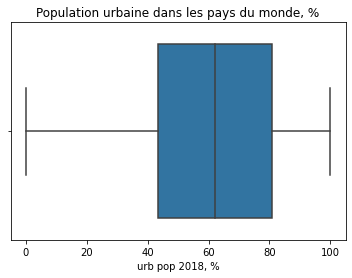

In [154]:
sns.boxplot(x = final_work_tab ['urb pop 2018, %']).set_title('Population urbaine dans les pays du monde, %')

Text(0.5, 1.0, 'Dynamique des populations urbaines dans le monde, %')

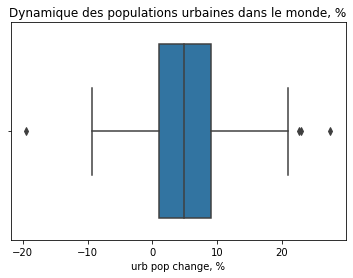

In [155]:
sns.boxplot(x = final_work_tab ['urb pop change, %']).set_title('Dynamique des populations urbaines dans le monde, %')

Text(0.5, 1.0, 'Indice de stabilité dans le monde')

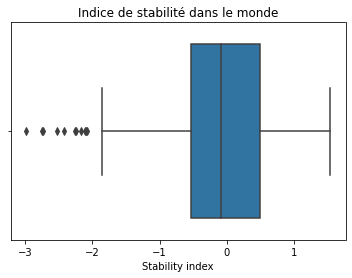

In [156]:
sns.boxplot(x = final_work_tab ['Stability index']).set_title('Indice de stabilité dans le monde')

In [157]:
final_work_tab.drop( final_work_tab[ final_work_tab ['Stability index'] < -2].index , inplace=True)

Text(0.5, 1.0, 'Consommation de protéïnes de volaille dans le monde, %')

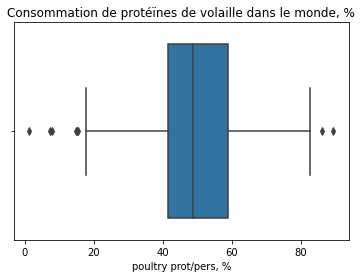

In [158]:
sns.boxplot(x = final_work_tab ['poultry prot/pers, %']).set_title('Consommation de protéïnes de volaille dans le monde, %')

In [159]:
final_work_tab.loc[final_work_tab['poultry prot/pers, %'] < 20]

,Zone,Population_y,"urb pop 2018, %","urb pop change, %","Import alim 2018, %","PIB, $","PIB growth, %","railway, km/km2",Stability index,"Import alim increase, %","chicken 2017, $/t","eggs 2017, $/t",Dens sprf agric/ha,% total UGB,"chick price change, %","egg price change, %","poultry prot/pers, %","product/pers, t"
64,Éthiopie,106399.924,20.442105,5.633017,67.0,2103.5,1.747037,0.1,-1.27,9.0,3872.000000,2284.000000,0.02,1.44,280.884523,84.149397,14.693878,0.490264
82,Guinée-Bissau,1828.145,44.122749,6.614664,49.0,1901.9,-0.131005,0.0,-0.68,-17.0,1791.794118,2046.705882,0.03,3.39,76.256882,-27.137562,19.743178,0.537157
130,Kazakhstan,18080.019,57.692142,1.087598,6.0,25544.3,6.108081,0.6,-0.03,1.0,1791.794118,1011.000000,0.00,5.02,157.812103,51.347305,7.892126,2.325329
131,Kenya,50221.142,26.797271,7.225015,43.0,4203.8,8.627647,0.5,-1.17,20.0,1791.794118,2046.705882,0.02,3.01,36.465660,133.909244,18.803419,0.527009
132,Kirghizistan,6189.733,35.364188,0.066145,29.0,5133.2,5.429177,0.2,-0.58,17.0,2008.000000,1781.000000,0.00,2.29,168.449198,102.616610,19.083333,1.285677
158,Mongolie,3113.786,67.399508,10.266167,8.0,11915.6,12.687808,0.1,0.84,-12.0,1791.794118,2046.705882,0.00,0.08,76.256882,35.993746,7.323658,0.539215
166,Niger,21602.382,16.329016,0.112321,45.0,1201.0,10.481766,0.0,-1.35,-7.0,1791.794118,2046.705882,0.00,1.57,76.256882,65.017362,17.622951,0.667658
174,Ouzbékistan,31959.785,50.305146,4.032551,13.0,6755.5,-16.174309,1.0,-0.29,4.0,1791.794118,2046.705882,0.03,6.08,76.256882,65.017362,15.403727,0.002034
198,République-Unie de Tanzanie,54660.339,35.441887,12.680957,18.0,2590.2,3.982837,0.5,-0.56,-18.0,1791.794118,2046.705882,0.01,2.26,76.256882,65.017362,19.714964,0.826705
227,Tadjikistan,8880.268,27.153388,0.653040,49.0,3415.3,0.536135,0.4,-0.74,33.0,1791.794118,2046.705882,0.01,3.08,-7.016392,79.693229,19.012116,0.774076


**COMMENTAIRE** : le *pourcentage de protéines dans l'alimentation* de la population du pays révèle, entre autres, l'importance des produits avicoles dans l'alimentation d'une nation. Il est intéressant de noter plusieurs pays relativement stables à très faible consommation de volaille (Mongolie, états d'Asie centrale). Apparemment, nous avons affaire ici à des préférences culturelles et au type traditionnel d'agriculture. Le climat excessivement sec et l'influence de la culture nomade définissent le faible niveau de consommation des produits avicoles. Par conséquent, ces pays représentent un marché aux faibles perspectives. L'exclusion de ces pays de la base de données n'a pas amélioré la qualité des résultats.

In [160]:
# exclude small countries
final_work_tab.drop( final_work_tab[ final_work_tab ['Population_y'] < 400].index , inplace=True)

Text(0.5, 1.0, 'Densité des surfaces agricoles/ ha')

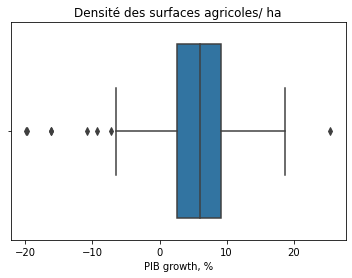

In [161]:
sns.boxplot(x = final_work_tab ['PIB growth, %']).set_title('Densité des surfaces agricoles/ ha')

In [162]:
final_work_tab.drop( final_work_tab[ final_work_tab ['PIB growth, %'] < -5].index , inplace=True)

In [163]:
# exclude superfluous data
final_work_tab_restricted = final_work_tab.drop(columns=['Population_y', 'railway, km/km2', 'eggs 2017, $/t', 'Import alim increase, %', 'chick price change, %', 'egg price change, %']).round(2)

# 2. Analyse de données

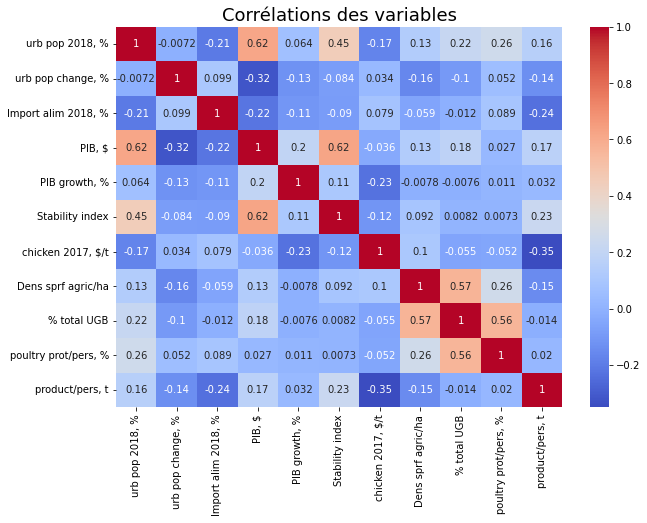

In [164]:
corr = final_work_tab_restricted.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title('Corrélations des variables',fontsize=18)
fig = plt.gcf()
fig.set_size_inches(10, 7)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.savefig("corr_variables.jpg")
plt.show()

**COMMENTAIRE** : les variables suivantes sont choisies pour l'analyse : <br>
1) niveau d'urbanisation de la population ("urb pop 2018, %") ; <br>
2) dynamique de la population urbaine au cours de la dernière décennie ("urb pop change, %") ; <br>
3) taux d'importation de produits d'alimentation ("import alim 2018, %") ; <br>
4) produit intérieur brut ("PIB, S") ; <br>
5) taux de variation du PIB au cours de la dernière décennie ("PIB grouth, %") ; <br>
6) indice de stabilité ("stability index") ; <br>
7) prix du poulet ("chicken 2017, S/t") ; <br>
8) surface relative des terrains agricoles ("Dens sprtagric/ha") ; <br>
9) quantité de poulets par rapport au nombre total d'animaux d'élévage ("% total UGB") ; <br>
10) consommation de protéines de volaille par personne ("poultry prod/pers, %") ; <br>
11) produits alimentaires totaux par personne ("product/pers, t"). <br>
### Nous recherchons des pays en développement dynamique, leur situation sociale et politique plutôt stable, avec une urbanisation croissante et un taux élevé de consommation de volailles.

## 2.1. Classification hiérarchique

In [165]:
tab = final_work_tab_restricted.set_index('Zone')

In [166]:
tab.head()

,"urb pop 2018, %","urb pop change, %","Import alim 2018, %","PIB, $","PIB growth, %",Stability index,"chicken 2017, $/t",Dens sprf agric/ha,% total UGB,"poultry prot/pers, %","product/pers, t"
Zone,,,,,,,,,,,
Afrique du Sud,65.90,8.05,6.0,12627.9,4.04,-0.22,1791.79,0.02,12.27,64.07,1.20
Albanie,61.40,19.76,22.0,13323.8,16.40,0.38,2470.00,0.06,10.02,43.55,1.47
Algérie,72.25,12.06,22.0,11642.2,1.08,-0.83,1791.79,0.03,21.49,46.23,0.65
Allemagne,76.54,1.49,5.0,53463.4,7.03,0.60,949.00,0.24,19.45,38.98,2.03
Arabie saoudite,83.47,3.24,7.0,47592.8,12.18,-0.55,1791.79,0.01,48.46,79.93,0.27


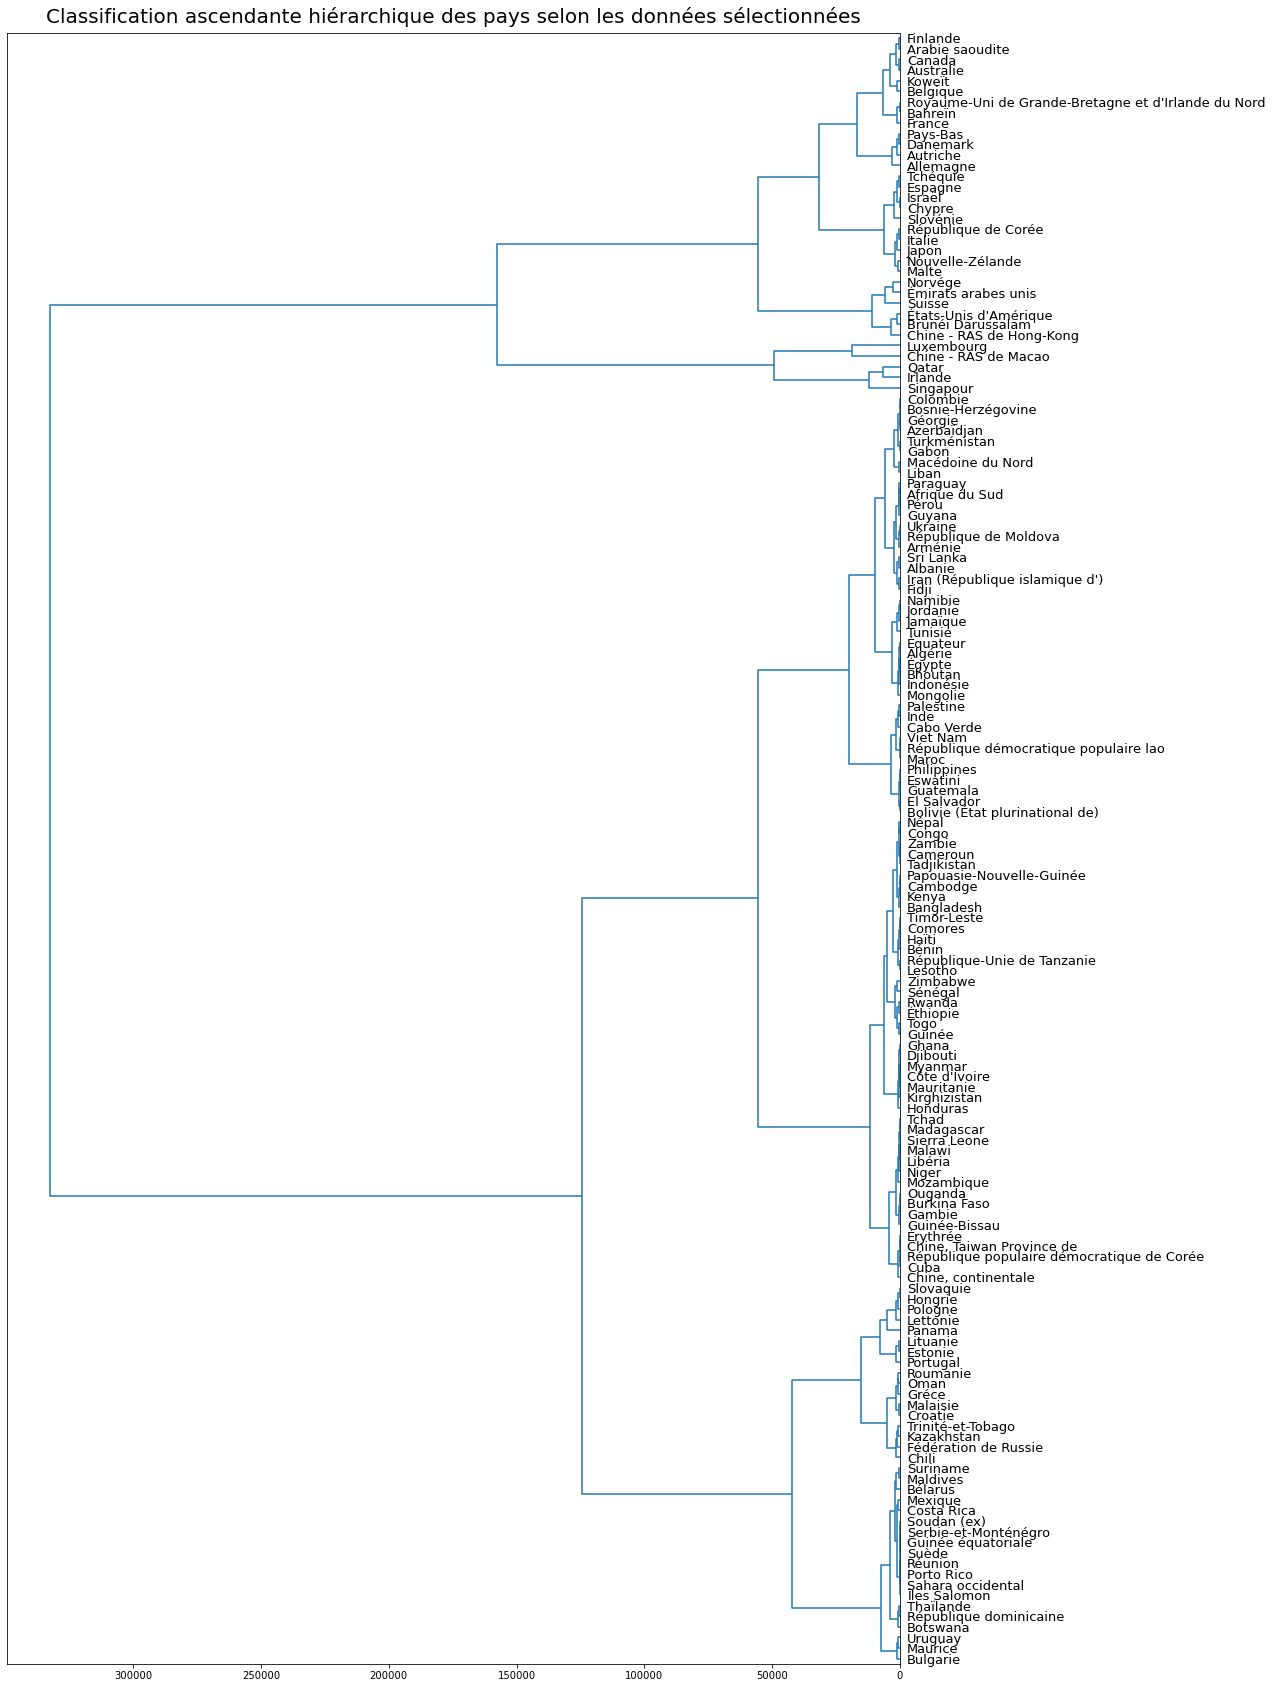

In [167]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage

Z = linkage(tab, method = 'ward', metric = 'euclidean')

plt.figure(figsize=(16,30))
plt.title('Classification ascendante hiérarchique des pays selon les données sélectionnées', fontsize = 20, pad = 10)
dendrogram(Z, labels = tab.index, orientation = 'left', color_threshold = 7, leaf_font_size=13)

plt.savefig("cluster_countries.jpg")
plt.show()

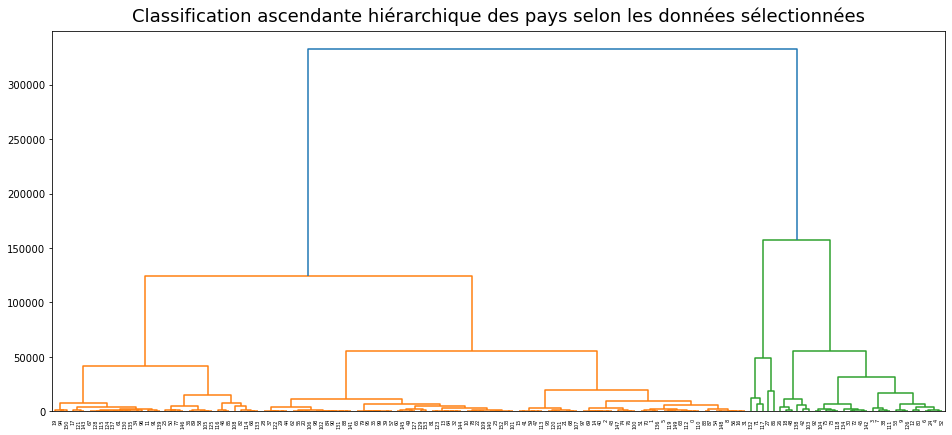

In [168]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(16, 7))  
pyplot.title("Classification ascendante hiérarchique des pays selon les données sélectionnées", fontsize = 18, pad = 10)
dend = shc.dendrogram(shc.linkage(tab, method='ward'))

plt.savefig("cluster_countries2.jpg")

### Coefficient de corrélation cophénétique

In [169]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet

In [170]:
c, coph_dists = cophenet(Z, pdist(tab))
print("COMMENTAIRE :" + "\033[1m" + " le coefficient de corrélation cophénétique" + "\033[0;0m" + " est assez élevé et prouve que les résultats de la classification hiérarchique sont bons:", round(c, 5))

COMMENTAIRE : le coefficient de corrélation cophénétique est assez élevé et prouve que les résultats de la classification hiérarchique sont bons: 0.75055


## 2.2. Algorithme K-means

In [171]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [172]:
from mpl_toolkits.mplot3d import Axes3D

In [173]:
# standartization of data
scaler = StandardScaler()

tab_scaled = scaler.fit_transform(tab)

In [174]:
tab_scaled

array([[ 0.19513256,  0.31852064, -0.50147391, ..., -0.3902572 ,
         0.91601417, -0.24919699],
       [-0.00871269,  2.29818979, -0.14491552, ..., -0.50862669,
        -0.24566271, -0.01837474],
       [ 0.48278085,  0.99644321, -0.14491552, ...,  0.09479466,
        -0.09394272, -0.71939048],
       ...,
       [-1.14707516,  0.95079755, -0.52375881, ...,  0.00746428,
        -1.352426  , -0.12951138],
       [-0.7892135 ,  0.47574457, -0.54604371, ..., -0.26031381,
        -1.12937499, -0.61680281],
       [-1.08093871, -0.53522225, -0.34547962, ..., -0.88267428,
        -0.72969474, -0.82197815]])

### Coefficient de silhouette

In [175]:
#silhouette score
range_n_clusters = list (range(2,7))
print ("Number of clusters from 2 to 6: \n", range_n_clusters)

Number of clusters from 2 to 6: 
 [2, 3, 4, 5, 6]


Pour n_clusters = 2 le silhouette_score moyen est : 0.15848450772437944
Pour n_clusters = 3 le silhouette_score moyen est : 0.1317455102410238
Pour n_clusters = 4 le silhouette_score moyen est : 0.0773989714812784
Pour n_clusters = 5 le silhouette_score moyen est : 0.052947513190465464
Pour n_clusters = 6 le silhouette_score moyen est : 0.03380157818508894


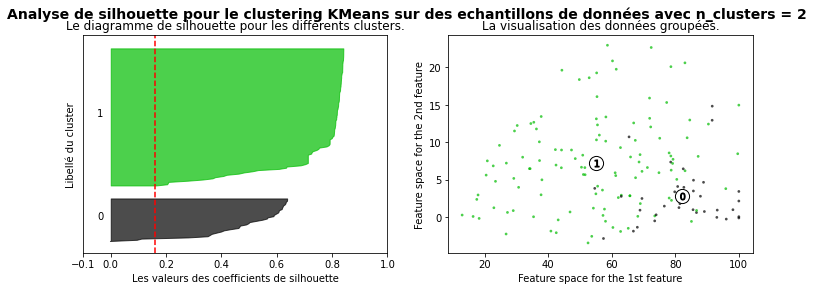

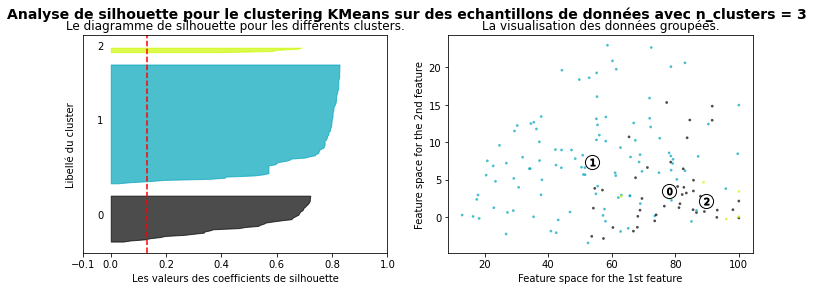

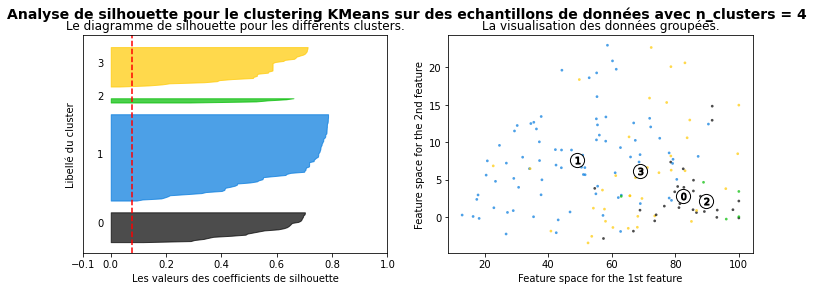

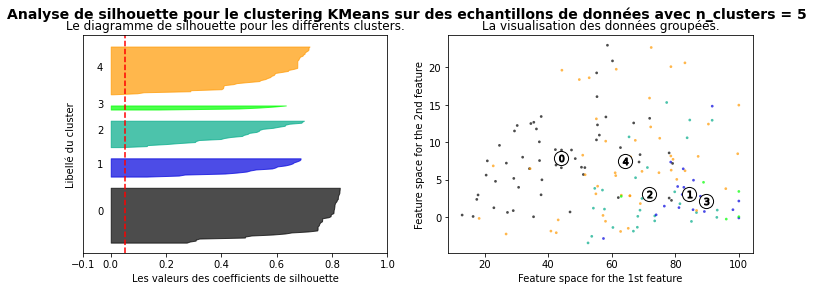

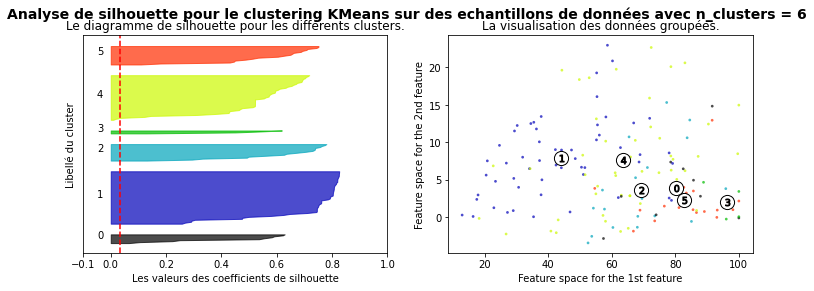

In [176]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(tab_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(tab)

    silhouette_avg = silhouette_score(tab_scaled, cluster_labels)
    print(
        "Pour n_clusters =",
        n_clusters,
        "le silhouette_score moyen est :",
        silhouette_avg,
    )
    
    sample_silhouette_values = silhouette_samples(tab, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("Le diagramme de silhouette pour les différents clusters.")
    ax1.set_xlabel("Les valeurs des coefficients de silhouette")
    ax1.set_ylabel("Libellé du cluster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        tab.iloc[:, 0], tab.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("La visualisation des données groupées.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Analyse de silhouette pour le clustering KMeans sur des echantillons de données avec n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
plt.savefig("k_means_analysis.jpg")
plt.show()

#### Méthode du coude

In [177]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(tab_scaled)
    Sum_of_squared_distances.append(km.inertia_)

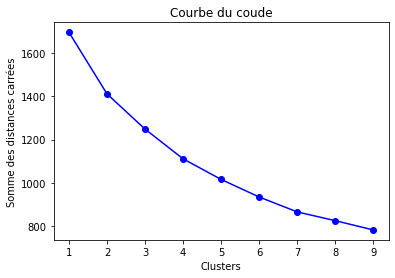

In [178]:
plt.plot(K, Sum_of_squared_distances, 'bo-')
plt.xlabel('Clusters')
plt.ylabel('Somme des distances carrées')
plt.title('Courbe du coude')
plt.savefig("k_means_elbow_plot.jpg")
plt.show()

**COMMENTAIRE** : selon la courbe de coude, quatre clusters représentent le niveau optimal de partitionnement des données.

In [179]:
kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=42)

In [180]:
kmeans.fit(tab_scaled)

KMeans(init='random', n_clusters=4, random_state=42)

In [181]:
clusters =  kmeans.predict(tab_scaled)

In [182]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 (3) dimensions for visualisation
pca = PCA(n_components=3)
pca.fit(tab_scaled)

# Transfer the scaled data to the new PCA space
tab_reduced = pca.transform(tab_scaled)

In [183]:
# Convert to a data frame
tab_reduced_df = pd.DataFrame(tab_reduced, index=tab.index, columns=['PC1','PC2', 'PC3'])
tab_reduced_df['cluster'] = clusters
tab_reduced_df.head()

,PC1,PC2,PC3,cluster
Zone,,,,
Afrique du Sud,-0.332159,0.254489,-0.330703,0
Albanie,-0.534419,-0.561116,0.101636,2
Algérie,-1.042356,0.583338,-0.068147,0
Allemagne,1.837303,-1.228878,-0.080629,3
Arabie saoudite,1.607227,1.450699,-0.403343,0


In [184]:
tab_reduced_df.reset_index()

,Zone,PC1,PC2,PC3,cluster
0,Afrique du Sud,-0.332159,0.254489,-0.330703,0
1,Albanie,-0.534419,-0.561116,0.101636,2
2,Algérie,-1.042356,0.583338,-0.068147,0
3,Allemagne,1.837303,-1.228878,-0.080629,3
4,Arabie saoudite,1.607227,1.450699,-0.403343,0
...,...,...,...,...,...
149,Ukraine,0.115112,-0.796600,-2.472449,0
150,Uruguay,1.111082,-1.942192,0.221291,3
151,Viet Nam,-1.102077,-0.587025,0.037494,2
152,Zambie,-1.398162,-0.406831,0.484295,2


In [185]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

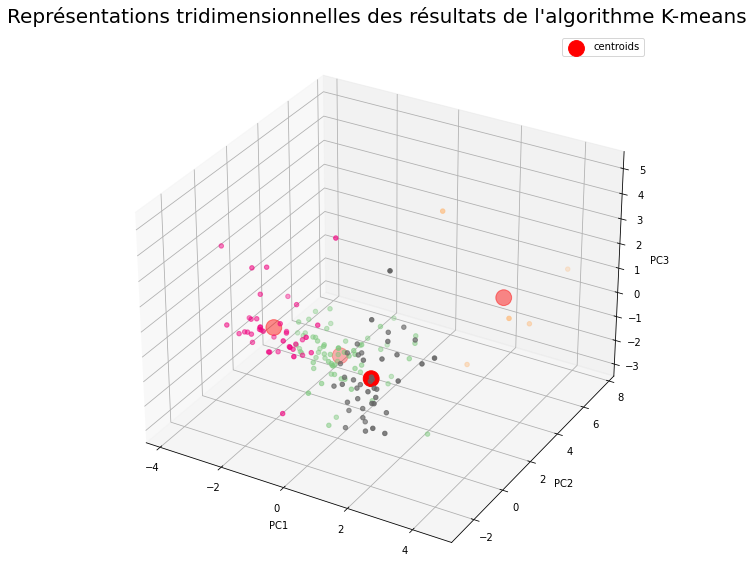

In [186]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(centres_reduced[:, 0],
            centres_reduced[:, 1],
            centres_reduced[:, 2],
            s = 250,
            marker='o',
            c='red',
            label='centroids')
scatter = ax.scatter(tab_reduced_df['PC1'],tab_reduced_df['PC2'], tab_reduced_df['PC3'],
                     c=clusters, s=20, cmap='Accent')


ax.set_title("Représentations tridimensionnelles des résultats de l'algorithme K-means", fontsize = 20, pad = 10)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.savefig("k_means_3d.jpg")
plt.show()

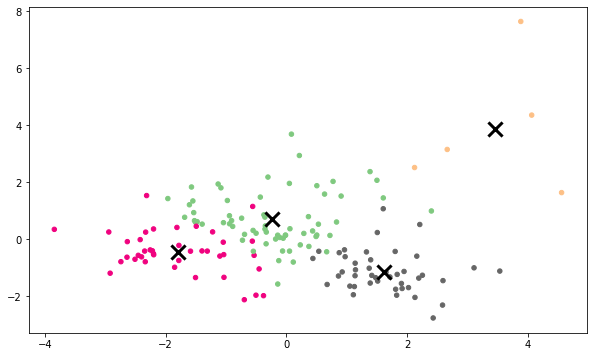

In [187]:
fig = plt.figure(figsize=(10,6))
plt.scatter(tab_reduced_df['PC1'],tab_reduced_df['PC2'],
                     c=clusters, s=20, cmap='Accent')
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=200, linewidths=3,
            color='black', zorder=10)
plt.savefig("k_means_2d.jpg")

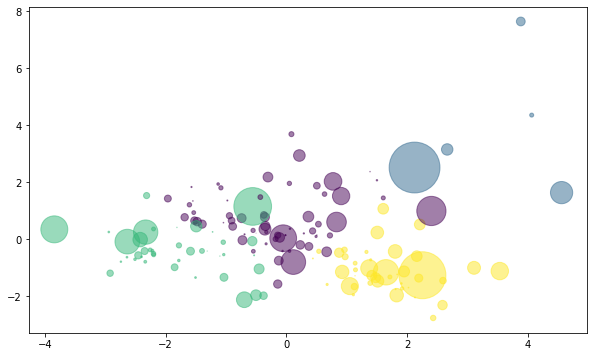

In [188]:
fig = plt.figure(figsize=(10,6))
x = tab_reduced_df['PC1']
y = tab_reduced_df['PC2']
colors = tab_reduced_df['cluster']
area = (10*tab_reduced_df['PC3'])**2
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

plt.show()

## 2.3. Comparaison de l'efficacité des méthodes de clustering

In [189]:
# from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import rand_score
import scipy.cluster.hierarchy as sch

In [190]:
# silhouette score pour hierarchical clustering ; Z = linkage(tab,method='ward',metric='euclidean')
groupes_cah = sch.fcluster(Z,t=5,criterion='distance') 

In [191]:
score_cah = silhouette_score(tab_scaled, groupes_cah)
print('The silhouette score for hierarchical clustering is', round(score_cah, 5))

The silhouette score for hierarchical clustering is 0.01299


In [192]:
# silhouette score pour K-means algorithme
for n_clusters in range_n_clusters:
    clusterer = KMeans (init="random", n_clusters=n_clusters, n_init=10, max_iter=300, random_state=42)
    clusterer.fit(tab)
    preds = clusterer.predict(tab)
    centers = clusterer.cluster_centers_
    score = round(silhouette_score (tab_scaled, preds), 4)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.1585)
For n_clusters = 3, silhouette score is 0.1465)
For n_clusters = 4, silhouette score is 0.0774)
For n_clusters = 5, silhouette score is 0.0542)
For n_clusters = 6, silhouette score is 0.0286)


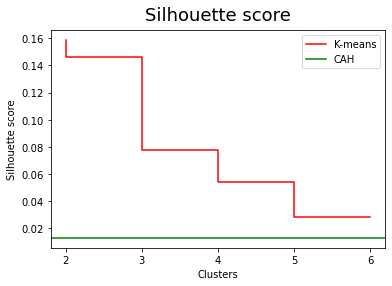

In [204]:
x = range_n_clusters
y = list()

for n_clusters in range_n_clusters:
    clusterer = KMeans (init="random", n_clusters=n_clusters, n_init=10, max_iter=300, random_state=42)
    clusterer.fit(tab)
    preds = clusterer.predict(tab)
    centers = clusterer.cluster_centers_
    score = round(silhouette_score (tab_scaled, preds), 4)
    y.append(score)
plt.step(x, y, color='red', label="K-means")

plt.axhline(y=score_cah, color='green', label="CAH")
plt.legend()
plt.ylabel("Silhouette score")
plt.xlabel("Clusters")
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.title('Silhouette score', fontsize=18, pad=10)
plt.savefig("silhouette_score_compared.jpg")
plt.show()

**COMMENTAIRE** : L'algorithme K-means est plus adapté à l'analyse des données dans ce cas, puisque le score de silhouette du clustering K-means pour six clusters est toujours supérieur au score de silhouette du clustering ascendante hiérarchique.

## 2.4. Comprendre les données : t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [205]:
from sklearn.manifold import TSNE
from numpy import reshape

In [206]:
tsne = TSNE(learning_rate=50)
tsne_features = tsne.fit_transform(tab)

In [207]:
tsne_features[1:4, :]

array([[  0.7910508 ,  -0.12108916],
       [  1.4112754 ,   1.0739518 ],
       [ -7.5507107 , -10.941957  ]], dtype=float32)

In [208]:
tab_tsne = tab.copy()

In [209]:
tab_tsne['x'] = tsne_features[:, 0]
tab_tsne['y'] = tsne_features[:, 1]

[Text(0.5, 1.0, 'Poultry product price, $/t')]

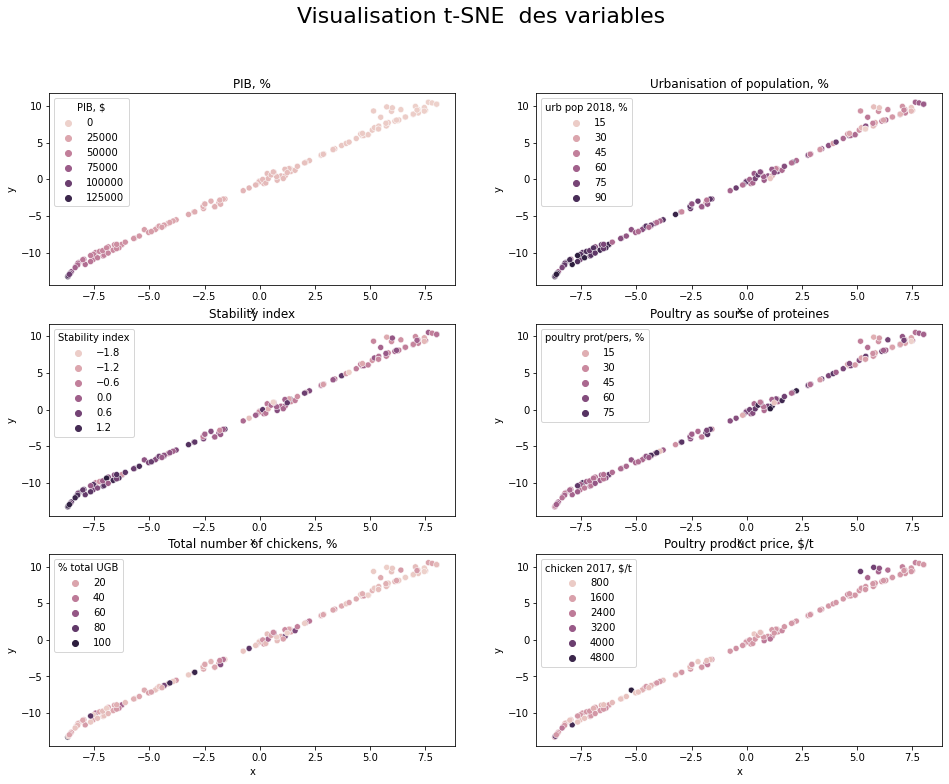

In [210]:
fig, axes = plt.subplots(3, 2, figsize=(16,12))
plt.suptitle('Visualisation t-SNE  des variables', fontsize=22)
sns.scatterplot(x='x', y='y', hue = 'PIB, $', data=tab_tsne, ax=axes[0,0]).set(title='PIB, %')
sns.scatterplot(x='x', y='y', hue = 'urb pop 2018, %', data=tab_tsne, ax=axes[0,1]).set(title='Urbanisation of population, %')
sns.scatterplot(x='x', y='y', hue = 'Stability index', data=tab_tsne, ax=axes[1,0]).set(title='Stability index')
sns.scatterplot(x='x', y='y', hue = 'poultry prot/pers, %', data=tab_tsne, ax=axes[1,1]).set(title='Poultry as sourse of proteines')
sns.scatterplot(x='x', y='y', hue = '% total UGB', data=tab_tsne, ax=axes[2,0]).set(title='Total number of chickens, %')
sns.scatterplot(x='x', y='y', hue = 'chicken 2017, $/t', data=tab_tsne, ax=axes[2,1]).set(title='Poultry product price, $/t')

In [211]:
tsne_results = tsne.fit_transform(tab_scaled)

In [212]:
tsne_results = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

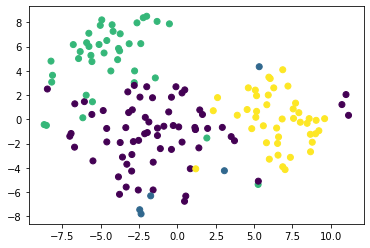

In [213]:
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c = tab_reduced_df.cluster)
plt.savefig("tsne_clusters.jpg")
plt.show()

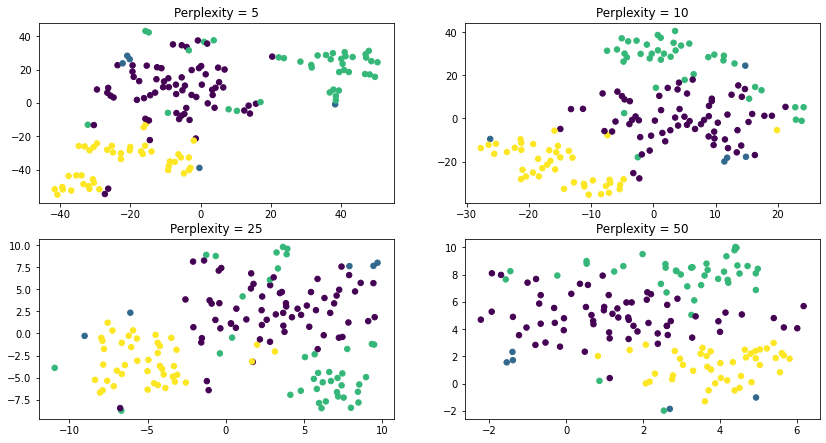

In [214]:
# perplexity is a parameter for the number of nearest neighbors based on which t-SNE will determine the potential neighbors
plt.figure(figsize = (14,4))
plt.subplots_adjust(top = 1.5)

for index, p in enumerate([5, 10, 25, 50]):

    tsne_test = TSNE(n_components = 2, perplexity = p, random_state=0)
    tsne_test_results = tsne_test.fit_transform(tab_scaled)
    
    tsne_test_results = pd.DataFrame(tsne_test_results, columns=['tsne1', 'tsne2'])
    
    plt.subplot(2,2,index+1)
    plt.scatter(tsne_test_results['tsne1'], tsne_test_results['tsne2'], c= tab_reduced_df.cluster, s=30)
    plt.title('Perplexity = '+ str(p))
plt.show()

## 2.5. Analyse en composantes principales

<AxesSubplot:ylabel='Density'>

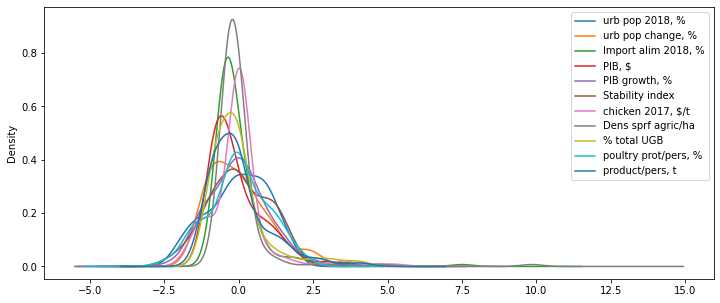

In [215]:
# scaled data
pd.DataFrame(tab_scaled,columns=tab.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

In [216]:
# 3. Import the PCA function from sklearn from sklearn.decomposition import PCA
# Select the number of principal components we will return
num_components = 11

# Create the PCA model
pca2 = PCA(n_components=num_components)

# Fit the model with the standardised data
pca2.fit(tab_scaled)

PCA(n_components=11)

In [217]:
pca2.explained_variance_ratio_

array([0.23927191, 0.17242507, 0.11558124, 0.10434337, 0.08971277,
       0.08095957, 0.05971931, 0.05246329, 0.03640191, 0.03201865,
       0.0171029 ])

In [218]:
pca2.explained_variance_ratio_.cumsum()

array([0.23927191, 0.41169698, 0.52727822, 0.6316216 , 0.72133437,
       0.80229394, 0.86201325, 0.91447654, 0.95087844, 0.9828971 ,
       1.        ])

**COMMENTAIRE** : les six premières composantes principales suffisent pour décrire 80% de la variance.

In [219]:
# nombre de variables
p = tab.shape[1]

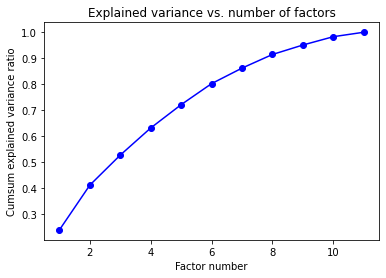

In [220]:
plt.plot(np.arange(1,p+1),np.cumsum(pca2.explained_variance_ratio_), 'bo-')
plt.title("Explained variance vs. number of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

### Eigenvalues - moments d'inertie

In [221]:
# nombre d'observations
n = tab.shape[0]
pca9 = PCA(n_components=11)
pca9.fit(tab_scaled)
# valeur corrigée 
eigvalue = (n-1)/n*pca9.explained_variance_ 
print(eigvalue)

[2.63199097 1.89667581 1.27139365 1.14777712 0.98684047 0.89055529
 0.65691244 0.57709616 0.40042097 0.3522052  0.18813192]


### Scree plot

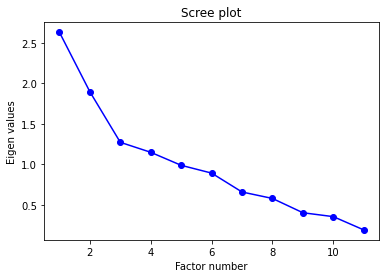

In [222]:
plt.plot(np.arange(1,p+1),eigvalue, 'bo-')
plt.title("Scree plot") 
plt.ylabel("Eigen values") 
plt.xlabel("Factor number") 
plt.show()

In [223]:
# Détermination du nombre de facteur à retenir
# seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [224]:
#test des bâtons brisés 
print(pd.DataFrame({'Val.Propre':eigvalue,'Seuils':bs}))

    Val.Propre    Seuils
0     2.631991  3.019877
1     1.896676  2.019877
2     1.271394  1.519877
3     1.147777  1.186544
4     0.986840  0.936544
5     0.890555  0.736544
6     0.656912  0.569877
7     0.577096  0.427020
8     0.400421  0.302020
9     0.352205  0.190909
10    0.188132  0.090909


**COMMENTAIRE** : les 4 premières composantes principales doivent être prises en considération.

### Pays de référence

In [225]:
reset_index_tab = final_work_tab_restricted.reset_index()

In [226]:
France_index = reset_index_tab.index[reset_index_tab['Zone']=='France'].tolist()
France_index

[53]

In [227]:
Suriname_index = reset_index_tab.index[reset_index_tab['Zone']=='Suriname'].tolist()
Suriname_index

[139]

In [228]:
Arabie_index = reset_index_tab.index[reset_index_tab['Zone']=='Arabie saoudite'].tolist()
Arabie_index

[4]

In [229]:
Indonesie_index = reset_index_tab.index[reset_index_tab['Zone']=='Indonésie'].tolist()
Indonesie_index

[69]

In [230]:
Kazakhstan_index = reset_index_tab.index[reset_index_tab['Zone']=="Kazakhstan"].tolist()
Kazakhstan_index

[77]

In [231]:
red_range = France_index + Suriname_index + Arabie_index + Indonesie_index + Kazakhstan_index

### Premier plan factoriel: composantes principales F1 et F2

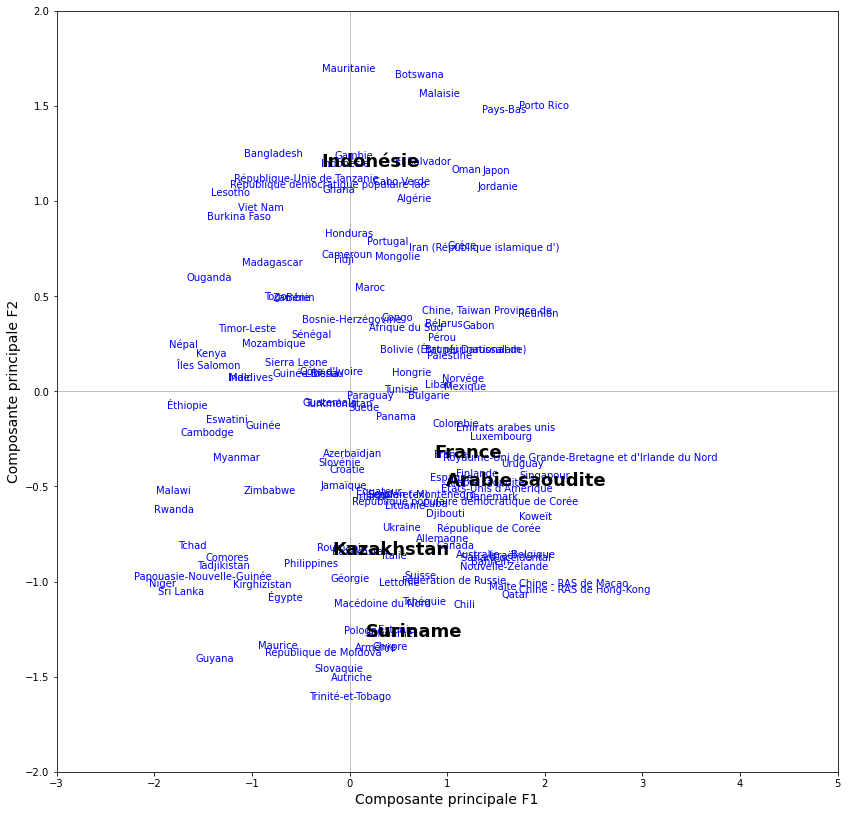

In [232]:
fig, axes = plt.subplots(figsize=(14,14))
axes.set_xlim(-3,5)
axes.set_ylim(-2,2)

for i in range(n): plt.annotate(tab.index[i],(tab_scaled[i,0], tab_scaled[i,1]), color = 'blue')

for j in red_range: plt.annotate(tab.index[j],(tab_scaled[j,0], tab_scaled[j,1]), color= 'black', fontsize=18, fontweight="bold")

plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.xlabel('Composante principale F1', fontsize=14)
plt.ylabel('Composante principale F2', fontsize=14)

plt.show()

In [233]:
#contribution des individus dans l'inertie totale
di = np.sum(tab_scaled**2,axis=1)
print(pd.DataFrame({'ID': tab.index,'contribution': di}))

                  ID  contribution
0     Afrique du Sud      2.101868
1            Albanie     11.707257
2            Algérie      4.684381
3          Allemagne      6.166196
4    Arabie saoudite     11.375627
..               ...           ...
149          Ukraine     17.634522
150          Uruguay     11.519415
151         Viet Nam      4.928999
152           Zambie      4.882278
153         Zimbabwe     18.385438

[154 rows x 2 columns]


In [234]:
#qualité de représentation des individus - COS2
cos2 = tab_scaled**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di    

print(pd.DataFrame({'id': tab.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

                  id    COS2_1    COS2_2
0     Afrique du Sud  0.018116  0.048269
1            Albanie  0.000006  0.451146
2            Algérie  0.049756  0.211960
3          Allemagne  0.074354  0.101341
4    Arabie saoudite  0.086338  0.021509
..               ...       ...       ...
149          Ukraine  0.006351  0.030470
150          Uruguay  0.209544  0.013654
151         Viet Nam  0.266947  0.183408
152           Zambie  0.127575  0.046358
153         Zimbabwe  0.063552  0.015581

[154 rows x 3 columns]


In [235]:
# Contribution des individus aux axes
ctr = tab_scaled**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigvalue[j])

print(pd.DataFrame({'id':tab.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

                  id         CTR_1     CTR_2
0     Afrique du Sud  9.394082e-05  0.000347
1            Albanie  1.872836e-07  0.018082
2            Algérie  5.750359e-04  0.003399
3          Allemagne  1.131143e-03  0.002139
4    Arabie saoudite  2.423109e-03  0.000838
..               ...           ...       ...
149          Ukraine  2.763027e-04  0.001840
150          Uruguay  5.955251e-03  0.000538
151         Viet Nam  3.246225e-03  0.003095
152           Zambie  1.536682e-03  0.000775
153         Zimbabwe  2.882684e-03  0.000981

[154 rows x 3 columns]


In [236]:
# vecteurs propres pour l’analyse des variables: les facteurs sont en ligne, les variables en colonne
print(pca2.components_)

[[ 0.46270462 -0.20248188 -0.21143617  0.49900275  0.16326663  0.40849194
  -0.17582748  0.22981301  0.28668087  0.20857988  0.21966807]
 [-0.02905986  0.05281913  0.19785987 -0.14559033 -0.16170065 -0.20972557
   0.21827731  0.47806948  0.5322973   0.45677743 -0.31258155]
 [ 0.0655313  -0.16558313  0.0234521   0.33524679 -0.18515441  0.25341414
   0.64225402  0.13215193 -0.1874471  -0.34204165 -0.41804703]
 [-0.37288674 -0.67820727 -0.25747814 -0.03564566  0.37103123 -0.27557535
  -0.0207164   0.26119329  0.09425171 -0.20526959  0.01219533]
 [ 0.00800014  0.05442503  0.52443442  0.09370265  0.69314266  0.12804877
  -0.15104245 -0.08673318 -0.07171747  0.0594618  -0.42107419]
 [-0.14914653 -0.4840203   0.68278237  0.05531007 -0.36959268  0.17332931
  -0.10381986 -0.08085072  0.01631644  0.03612363  0.29782604]
 [-0.14979819  0.2600263   0.07307031 -0.12190519 -0.13234446  0.29837914
  -0.43617803  0.56706956  0.04960435 -0.51330467 -0.07375683]
 [-0.41994894  0.2628167   0.04035481 -0.

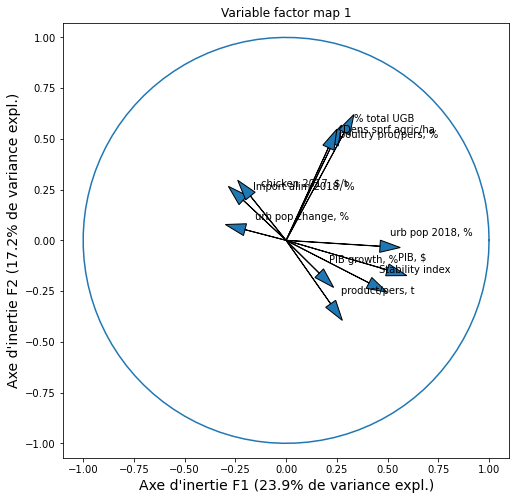

In [237]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for j in range(0, pca2.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca2.components_[0, j],  #0 for PC1
             pca2.components_[1, j],  #1 for PC2
             head_width=0.06,
             head_length=0.1)

    plt.text(pca2.components_[0, j] + 0.05,
             pca2.components_[1, j] + 0.05,
             tab.columns.values[j])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
plt.xlabel("Axe d'inertie F1 (23.9% de variance expl.)", fontsize=14)
plt.ylabel("Axe d'inertie F2 (17.2% de variance expl.)", fontsize=14)
ax.set_title('Variable factor map 1')
plt.show()

**INTERPRETATION** : F1 représente la stabilité socio-économique et alimentaire générale (les pays riches et stables sont situés sur le côté gauche) ; F2 représente le degré de développement et l'importance, de l'agriculture et de la production avicole dans un pays.

### Deuxième plan factoriel : composantes principales F3 et F4

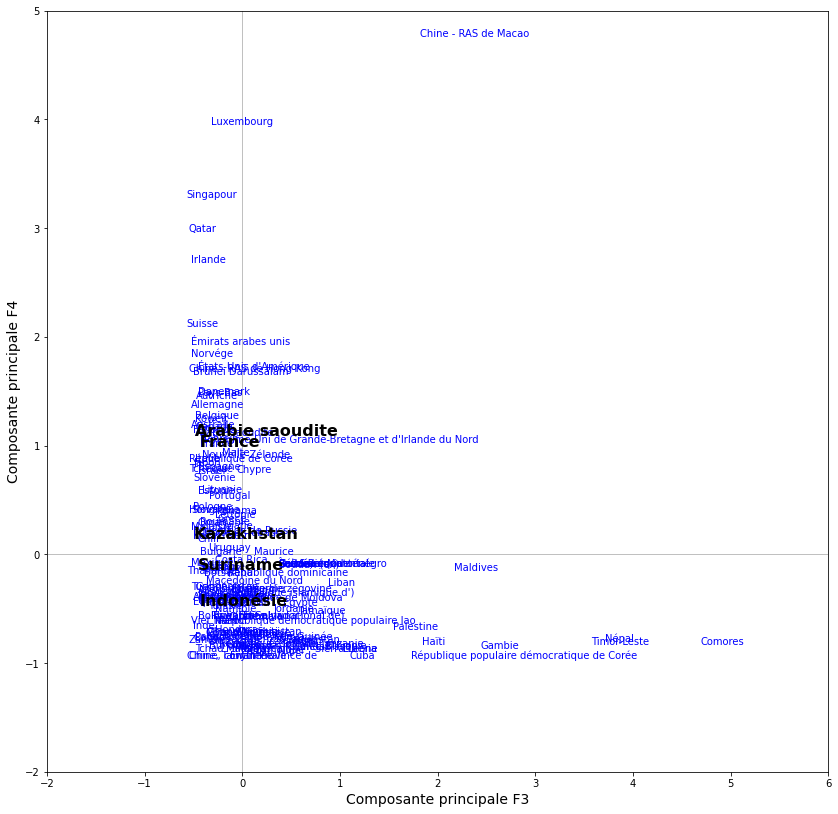

In [238]:
fig, axes = plt.subplots(figsize=(14,14))
axes.set_xlim(-2,6)
axes.set_ylim(-2,5)

for i in range(n): plt.annotate(tab.index[i],(tab_scaled[i,2], tab_scaled[i,3]), color = 'blue')

for j in red_range: plt.annotate(tab.index[j],(tab_scaled[j,2], tab_scaled[j,3]), color= 'black', fontsize=16, fontweight="bold")

plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.xlabel('Composante principale F3', fontsize=14)
plt.ylabel('Composante principale F4', fontsize=14)
plt.show()

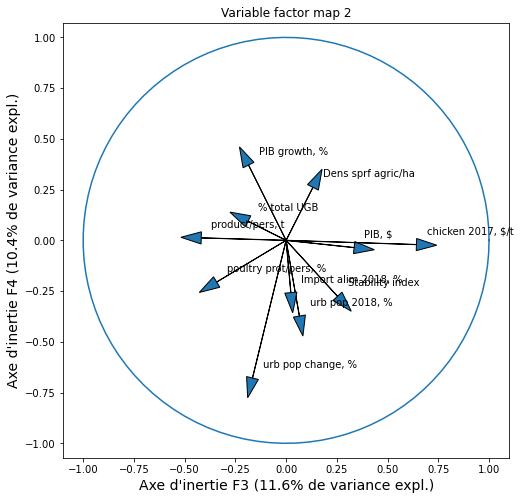

In [239]:
(fig, ax) = plt.subplots(figsize=(8, 8))
for j in range(0, pca2.components_.shape[1]):
    ax.arrow(0,
             0,
             pca2.components_[2, j],
             pca2.components_[3, j],
             head_width=0.06,
             head_length=0.1)

    plt.text(pca2.components_[2, j] + 0.05,
             pca2.components_[3, j] + 0.05,
             tab.columns.values[j])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
ax.set_title('Variable factor map 2')
plt.xlabel("Axe d'inertie F3 (11.6% de variance expl.)", fontsize=14)
plt.ylabel("Axe d'inertie F4 (10.4% de variance expl.)", fontsize=14)
plt.show()

**INTERPRETATION :** F3 représente la stabilité du marché de la volaille (les pays sur la partie droite du graphique ont un marché moins stable des produits avicoles). F4 représente la dynamique socio-économique de développement des pays (les pays les plus dynamiques sont en haut du graphique).

### Troisième plan factoriel : composantes principales F5 et F6

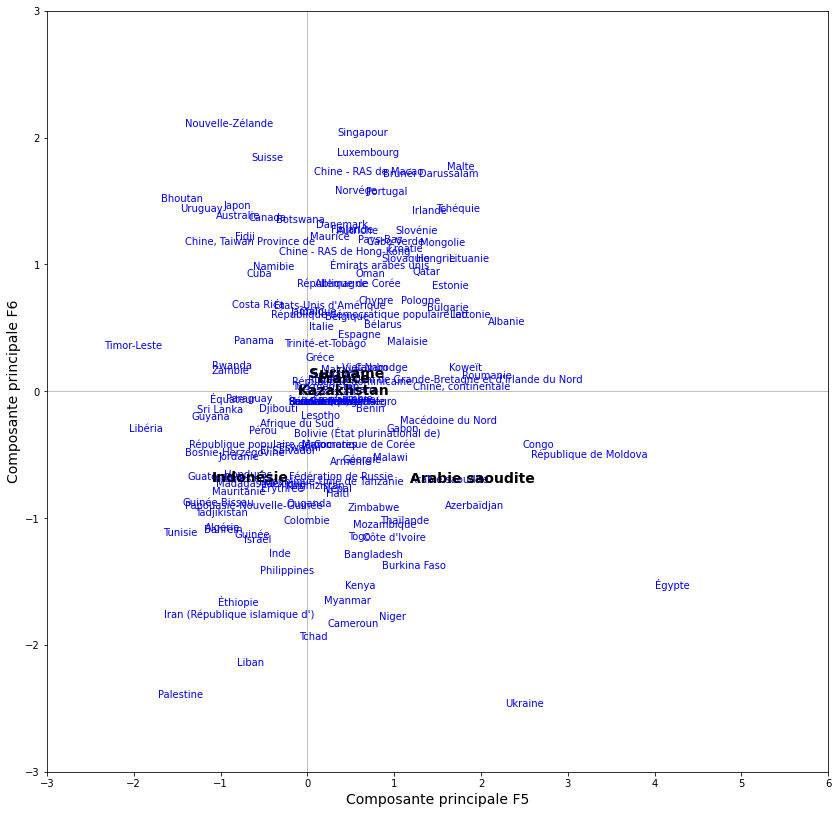

In [240]:
fig, axes = plt.subplots(figsize=(14,14))
axes.set_xlim(-3,6)
axes.set_ylim(-3,3)

for i in range(n): plt.annotate(tab.index[i],(tab_scaled[i,4], tab_scaled[i,5]), color = 'blue')

for j in red_range: plt.annotate(tab.index[j],(tab_scaled[j,4], tab_scaled[j,5]), color= 'black', fontsize=14, fontweight="bold")

plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.xlabel('Composante principale F5', fontsize=14)
plt.ylabel('Composante principale F6', fontsize=14)

plt.show()

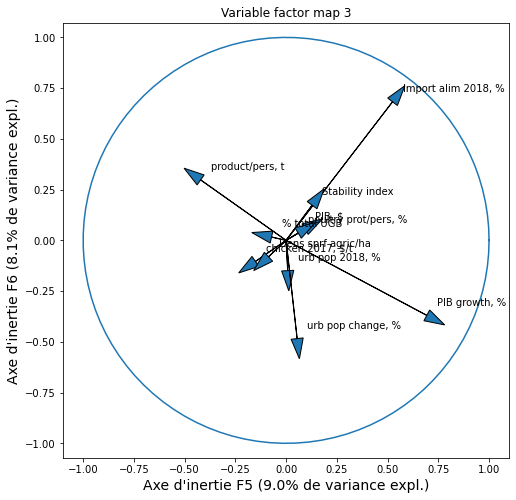

In [241]:
(fig, ax) = plt.subplots(figsize=(8, 8))
for j in range(0, pca2.components_.shape[1]):
    ax.arrow(0,
             0,
             pca2.components_[4, j],
             pca2.components_[5, j],
             head_width=0.06,
             head_length=0.1)

    plt.text(pca2.components_[4, j] + 0.05,
             pca2.components_[5, j] + 0.05,
             tab.columns.values[j])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
plt.xlabel("Axe d'inertie F5 (9.0% de variance expl.)", fontsize=14)
plt.ylabel("Axe d'inertie F6 (8.1% de variance expl.)", fontsize=14)
ax.set_title('Variable factor map 3')
plt.show()

**INTERPRETATION** : F5 représente l'état général du marché alimentaire des pays (les pays de la partie droite du graphique dépendent davantage des importations alimentaires). F6 représente la stabilité démographique des pays (les pays les plus stables sont situés en haut du graphique).

 # 3. Interprétation des données

## 3.1. Clustermap

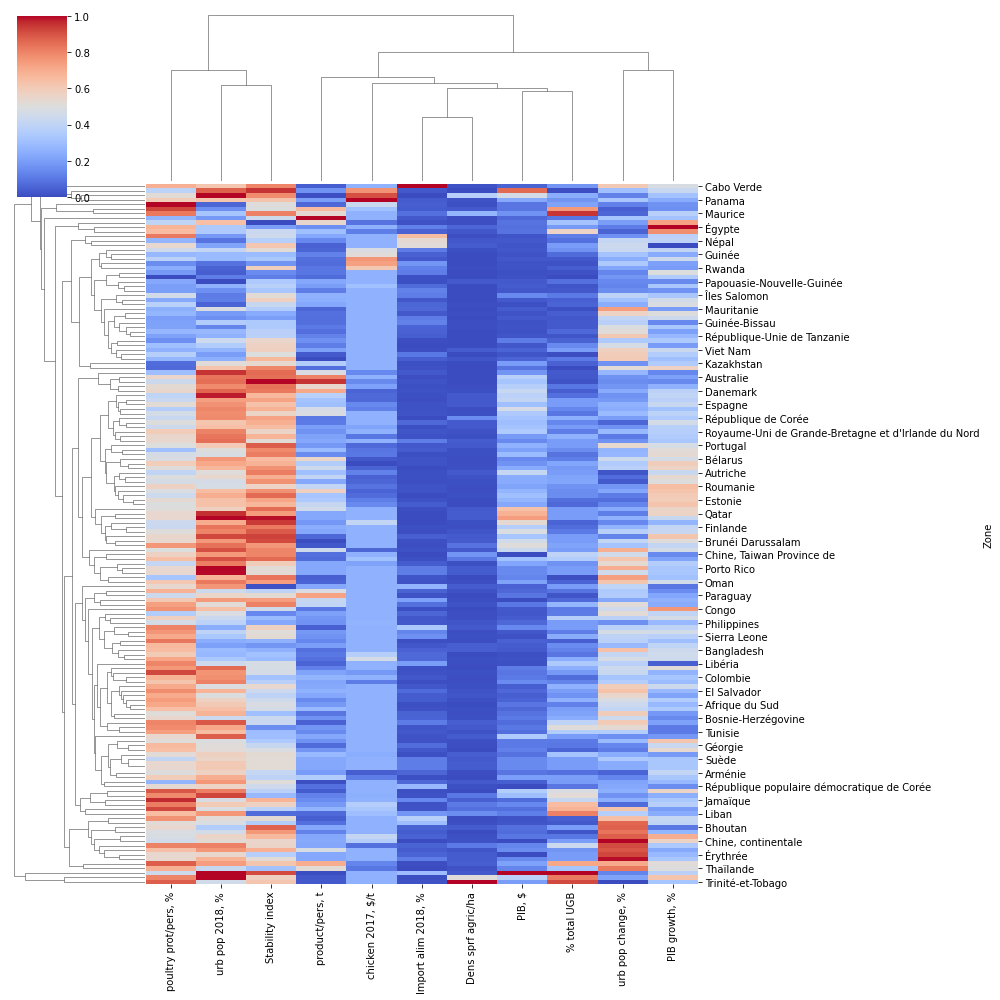

In [242]:
# Standardize the data within the columns
sns.clustermap(tab, figsize=(14, 14), standard_scale=1, cmap="coolwarm").savefig("clustermap_countries.png")
plt.show()

**COMMENTAIRE** : La relation étroite entre des facteurs tels que l'indice de stabilité, l'urbanisation et la consommation de produits avicoles est à relever. La relation entre le niveau d'importation de produits alimentaires et la surface relative des terres agricoles est aussi à relever.

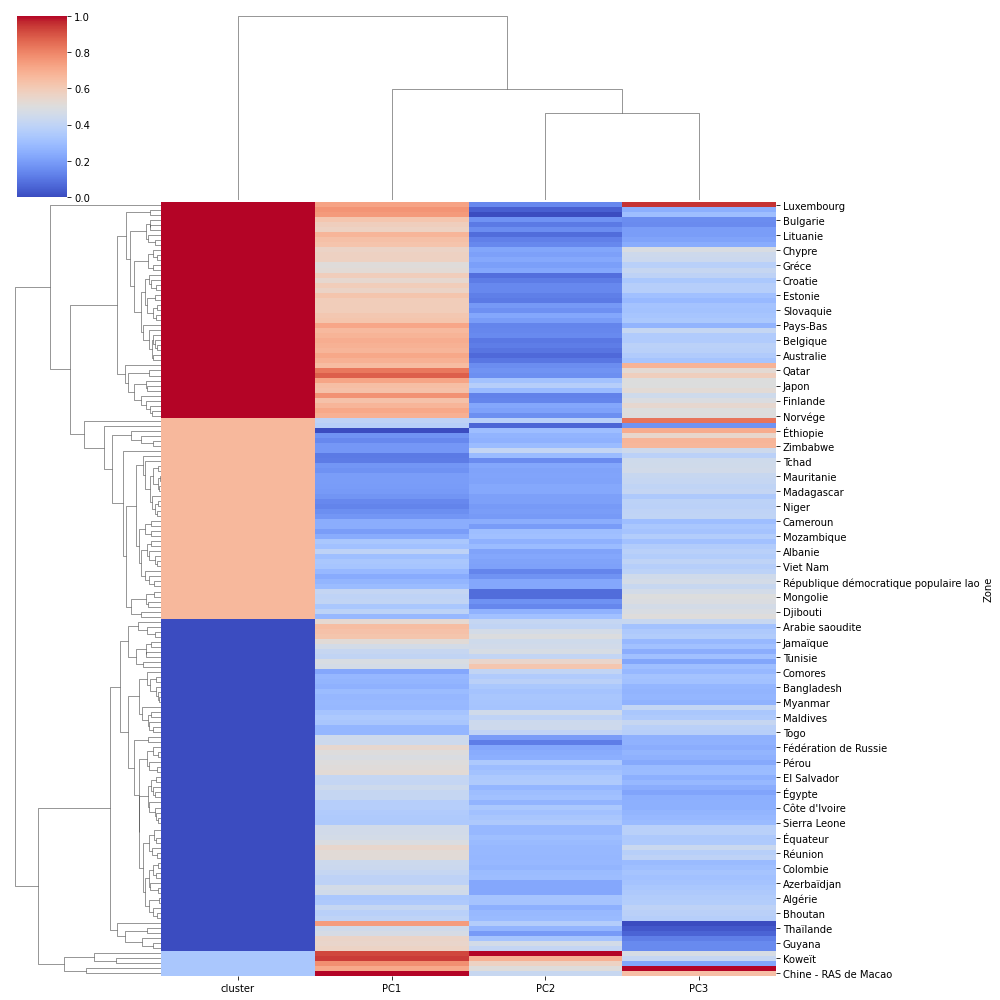

In [243]:
sns.clustermap(tab_reduced_df, figsize=(14, 14), standard_scale=1, cmap="coolwarm").savefig("clustermap_clusters.png")
plt.show()

**COMMENTAIRE** : les cinq clusters représentent des groupes bien délimités de pays qui partagent des caractéristiques communes spécifiques : <br>
* CLUSTER 3, **« cluster rouge »** - les pays avec un PIB élevé, un indice de stabilité élevé, et un marché de produits alimentaires stable et plutôt saturé. Ce marché saturé ne semble donc pas favorable à l'importation de volailles, <br>
* CLUSTER 2, **« cluster orange »** - les pays qui représentent un marché d'importation trop insignifiant ou instable : faible consommation de volailles et géopolitiquement instable, <br>
* CLUSTER 0, **« cluster bleu foncé »** - les pays relativement stables avec un marché de produits alimentaires en croissance dynamique ; ce groupe de pays représente un intérêt potentiel pour l'importation de produits alimentaires, <br>
* CLUSTER 1, **« cluster bleu clair »** - un petit groupe de pays avec un PIB élevé, un niveau d'urbanisation très élevé et un coût de production agricole élevé. Ces pays semblent donc présenter un intérêt particulier pour l'importation de volailles. 

## 3.2. Choropleth map visualisation

In [244]:
import geopandas as gpd

In [245]:
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [246]:
print(f"{type(df_world)}, {df_world.geometry.name}")

<class 'geopandas.geodataframe.GeoDataFrame'>, geometry


In [247]:
df_world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [248]:
df_world = df_world[(df_world.pop_est>0) & (df_world.name!="Antarctica")]

In [249]:
country_code = pd.read_csv ('country_code_csv3.csv', encoding='latin-1')

In [250]:
country_code.head()

,Zone,ISO 3166-1 alpha-2,ISO 3166-1 alpha-3,ISO 3166-1 numérique
0,Afghanistan,AF,AFG,4
1,Albanie,AL,ALB,8
2,Algérie,DZ,DZA,12
3,Samoa américaines,AS,ASM,16
4,Andorre,AD,AND,20


In [251]:
country_code.rename(columns = {'ISO 3166-1 alpha-3':'iso_a3'}, inplace = True)

In [252]:
country_code.drop(['ISO 3166-1 alpha-2', 'ISO 3166-1 numérique'], axis=1, inplace=True)

In [253]:
country_code.sample()

,Zone,iso_a3
26,Bosnie-Herzégovine,BIH


### Erreurs de type de données

In [254]:
country_code.loc[(country_code['Zone'] == 'France'), ['Zone', 'iso_a3']]

,Zone,iso_a3
75,France,FRA


In [255]:
df_world.loc[(df_world['name'] == 'France'), ['name', 'iso_a3']]

,name,iso_a3
43,France,-99


In [256]:
df_world.at[43, "iso_a3"] = "FRA"

In [257]:
country_code.loc[(country_code['Zone'] == 'Norvége'), ['Zone', 'iso_a3']]

,Zone,iso_a3
162,Norvége,NOR


In [258]:
df_world.loc[(df_world['name'] == 'Norway'), ['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est']]

,pop_est,continent,name,iso_a3,gdp_md_est
21,5320045,Europe,Norway,-99,364700.0


In [259]:
df_world.at[21, "iso_a3"] = "NOR"

In [260]:
main_tab_code = main_work_tab.merge(country_code, on = 'Zone', how='left')

In [261]:
main_tab_code = main_tab_code.dropna()
main_tab_code = main_tab_code.reset_index(drop=True)

In [262]:
tab_world = df_world.merge(main_tab_code, how="left", on = 'iso_a3')
print("Type of DataFrame : ", type(tab_world), tab_world.shape[0])
tab_world.head()

Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'> 176


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Zone,Population_y,Increase rate (%),"urb pop 2018, %",...,Stability index,"Import alim increase, %","chicken 2017, $/t","eggs 2017, $/t",Dens sprf agric/ha,% total UGB,"chick price change, %","egg price change, %","poultry prot/pers, %","product/pers, t"
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fidji,877.459,0.46,58.078763,...,0.880000,13.000000,1791.794118,4032.000000,0.1300,27.17000,76.256882,106.029637,65.884591,2.634881
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",République-Unie de Tanzanie,54660.339,2.82,35.441887,...,-0.560000,-18.000000,1791.794118,2046.705882,0.0100,2.26000,76.256882,65.017362,19.714964,0.826705
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",Sahara occidental,552.615,3.24,86.688626,...,-0.091702,3.840426,1814.456807,2074.690084,0.2515,19.46883,81.650300,89.399299,48.807201,1.489344
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,36732.095,1.07,81.145924,...,0.990000,3.000000,1587.000000,1790.000000,0.0300,9.89000,55.740922,68.549906,47.728473,3.532388
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",États-Unis d'Amérique,325084.756,0.84,82.173581,...,0.470000,3.000000,1202.000000,1214.000000,0.0500,13.85000,60.266667,92.698413,33.464727,2.996246


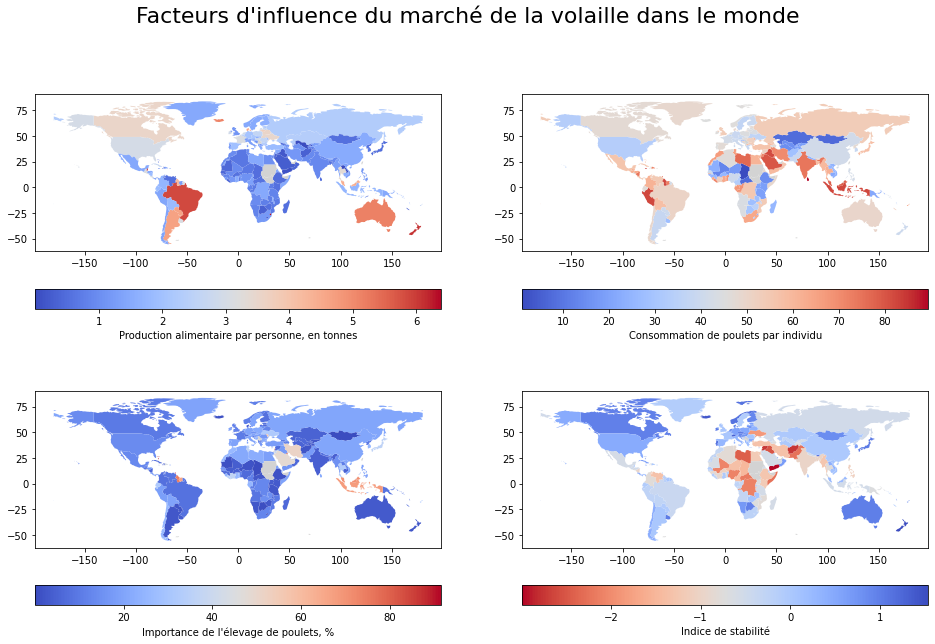

In [263]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
plt.suptitle("Facteurs d'influence du marché de la volaille dans le monde", fontsize=22)

tab_world.plot(column='product/pers, t', cmap='coolwarm', missing_kwds={'color': 'lightgrey'},
            ax=axes[0,0],
            legend=True,
            legend_kwds={'label': "Production alimentaire par personne, en tonnes", 'orientation': "horizontal"})

tab_world.plot(column='poultry prot/pers, %', cmap='coolwarm', missing_kwds={'color': 'lightgrey'},
            ax=axes[0,1],
            legend=True,
            legend_kwds={'label': "Consommation de poulets par individu", 'orientation': "horizontal"})

tab_world.plot(column='% total UGB', cmap='coolwarm', missing_kwds={'color': 'lightgrey'},
            ax=axes[1,0],
            legend=True,
            legend_kwds={'label': "Importance de l'élevage de poulets, %", 'orientation': "horizontal"})

tab_world.plot(column='Stability index', cmap='coolwarm_r', missing_kwds={'color': 'lightgrey'},
            ax=axes[1,1],
            legend=True,
            legend_kwds={'label': "Indice de stabilité", 'orientation': "horizontal"})
plt.savefig("world_poultry.jpg")
plt.show()

In [264]:
tab_cluster_geo = pd.DataFrame(tab_reduced, index=tab.index, columns=['PC1','PC2', 'PC3'])
tab_cluster_geo['cluster'] = clusters

In [265]:
tab_cluster_geo['cluster'] = tab_cluster_geo['cluster']

In [266]:
cluster_tab_code = tab_cluster_geo.merge(country_code, on = 'Zone', how='left')

In [267]:
cluster_world = df_world.merge(cluster_tab_code, how="left", on = 'iso_a3')

In [268]:
cluster_world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Zone,PC1,PC2,PC3,cluster
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fidji,0.435590,0.293137,-0.625865,0.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",République-Unie de Tanzanie,-2.338582,-0.785557,0.284585,2.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",Sahara occidental,0.492725,0.099313,0.223931,0.0
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,1.907903,-1.546427,0.160773,3.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",États-Unis d'Amérique,1.811981,-1.748835,0.097527,3.0


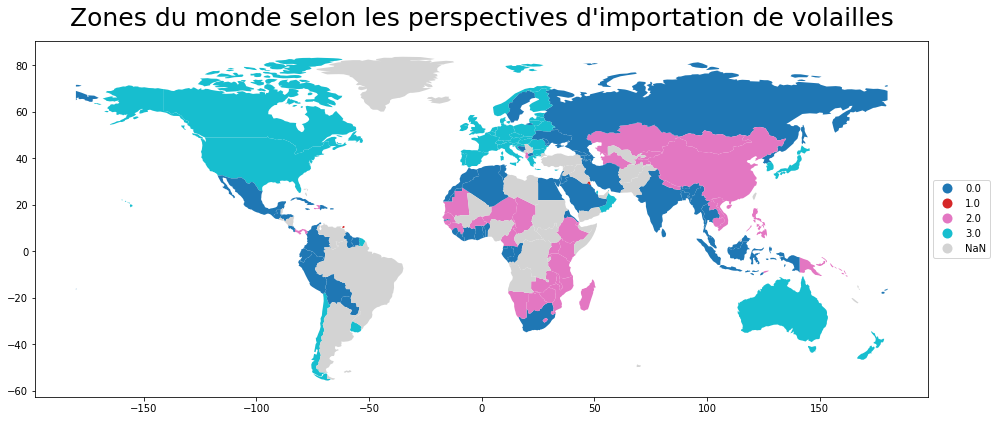

In [269]:
ax = cluster_world.plot( column='cluster', categorical=True, cmap='tab10', legend=True, figsize=(16,10),
                missing_kwds={'color': 'lightgrey'},
                legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5), 'fmt': "{:.0f}"})

plt.title("Zones du monde selon les perspectives d'importation de volailles", fontdict={"fontsize": "25", "fontweight" : "3"}, pad = 15)

plt.savefig("cluster_map.jpg")
plt.show()

## 3.3. Interprétation des caractéristiques des clusters

In [270]:
tab['cluster'] = clusters

In [271]:
cluster_1 = tab.loc[tab['cluster'] == 1.0]

In [272]:
cluster_1.head()

,"urb pop 2018, %","urb pop change, %","Import alim 2018, %","PIB, $","PIB growth, %",Stability index,"chicken 2017, $/t",Dens sprf agric/ha,% total UGB,"poultry prot/pers, %","product/pers, t",cluster
Zone,,,,,,,,,,,,
Chine - RAS de Hong-Kong,100.00,-0.09,4.0,61062.9,5.05,0.79,4637.00,2.61,24.29,47.12,0.06,1
Chine - RAS de Macao,100.00,0.08,110.0,132417.0,6.98,1.26,1791.79,0.24,100.00,40.48,0.03,1
Koweït,100.00,2.17,7.0,50478.6,14.27,0.11,1791.79,3.57,81.77,71.54,0.20,1
Maurice,40.83,-1.84,34.0,22208.1,6.73,0.88,1791.79,1.91,94.79,74.14,3.43,1
Trinité-et-Tobago,52.52,-3.42,9.0,26250.4,5.34,0.25,1791.79,7.01,91.57,78.64,0.24,1


In [273]:
cluster_characteristics = tab.groupby('cluster').mean()

In [274]:
cluster_characteristics.head()

,"urb pop 2018, %","urb pop change, %","Import alim 2018, %","PIB, $","PIB growth, %",Stability index,"chicken 2017, $/t",Dens sprf agric/ha,% total UGB,"poultry prot/pers, %","product/pers, t"
cluster,,,,,,,,,,,
0,63.091212,7.364091,37.716061,12942.784545,5.781970,-0.353030,1749.491061,0.199545,25.853788,60.961970,1.460909
1,78.670000,-0.620000,32.800000,58483.400000,7.674000,0.658000,2360.832000,3.068000,78.484000,62.384000,0.792000
2,39.571750,8.017000,34.179500,6407.746000,5.684750,-0.364250,2119.739500,0.056250,7.524750,28.006000,0.993500
3,77.790233,3.393953,8.581395,47008.151163,8.618837,0.760233,1454.536512,0.163023,14.702558,44.635349,2.083023


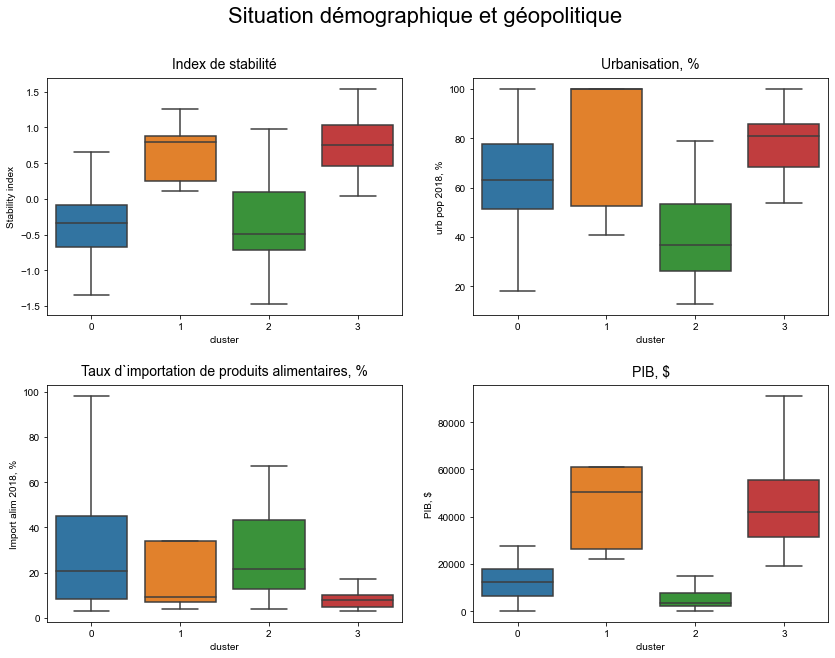

In [275]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Situation démographique et géopolitique', fontsize=22)

sns.set_style(style="whitegrid")

plt.subplot(2,2,1)
sns.boxplot(x = 'cluster', y = 'Stability index', data = tab, showfliers=False)
plt.title('Index de stabilité', fontsize=14, pad=10)

plt.subplot(2,2,2)
sns.boxplot(x = 'cluster', y = 'urb pop 2018, %', data = tab, showfliers=False)
plt.title('Urbanisation, %', fontsize=14, pad=10)

plt.subplot(2,2,3)
sns.boxplot(x = 'cluster', y = 'Import alim 2018, %', data = tab, showfliers=False)
plt.title('Taux d`importation de produits alimentaires, %', fontsize=14, pad=10)

plt.subplot(2,2,4)
sns.boxplot(x = 'cluster', y = 'PIB, $', data = tab, showfliers=False)
plt.title('PIB, $', fontsize=14, pad=10)

plt.savefig("clusters_geopolitics.jpg")
plt.show()

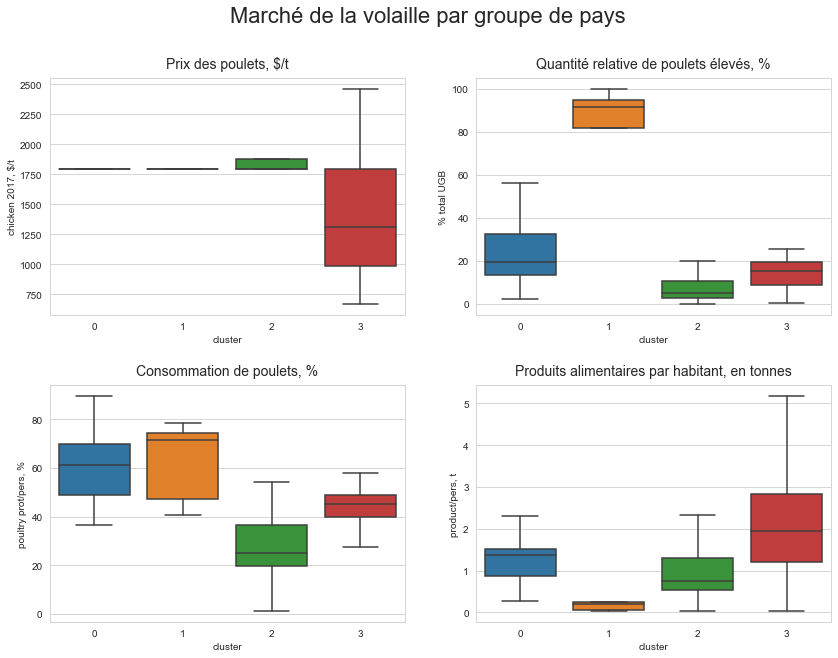

In [276]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Marché de la volaille par groupe de pays', fontsize=22)

sns.set_style(style="whitegrid")

plt.subplot(2,2,1)
sns.boxplot(x = 'cluster', y = 'chicken 2017, $/t', data = tab, showfliers=False)
plt.title('Prix des poulets, $/t', fontsize=14, pad=10)

plt.subplot(2,2,2)
sns.boxplot(x = 'cluster', y = '% total UGB', data = tab, showfliers=False)
plt.title('Quantité relative de poulets élevés, %', fontsize=14, pad=10)

plt.subplot(2,2,3)
sns.boxplot(x = 'cluster', y = 'poultry prot/pers, %', data = tab, showfliers=False)
plt.title('Consommation de poulets, %', fontsize=14, pad=10)

plt.subplot(2,2,4)
sns.boxplot(x = 'cluster', y = 'product/pers, t', data = tab, showfliers=False)
plt.title('Produits alimentaires par habitant, en tonnes', fontsize=14, pad=10)

plt.savefig("clusters_chicken_market.jpg")
plt.show()

## Les caractéristiques des quatre groupes de pays :  <br>

1) Les **pays avec un marché en croissance dynamique** (cluster 0). Ces pays se caractérisent par un PIB et un indice de stabilité relativement bas, mais avec une dynamique de croissance positive. Le niveau d'urbanisation est souvent très élevé. L'importation de produits d'alimentation peut être très importante. Ces pays se caractérisent par une production d'alimentation modérée, un prix de produits avicoles aligné sur les prix mondiaux, et une très forte consommation de produits avicoles. **Le vaste marché dynamique de cette catégorie de pays peut représenter un intérêt particulier pour l'importation de volailles**, malgré certains risques.  <br>

2) Les **pays stables aux capacités agricoles limitées** (cluster 1). Petits pays avec un niveau d'urbanisation très élevé, un PIB élevé, un indice de stabilité élevé, un niveau élevé de consommation de volailles et les prix de produits avicoles aligné sur les prix mondiaux. Les ressources limitées pour l'agriculture sont une cause de faible production alimentaire par habitant. Il semble donc que ces pays présentent un intérêt pour l'importation de poulets. Un facteur négatif est la taille plutôt réduite du marché. <br>

3) Les **pays à faible consommation de produits avicoles** (cluster 2). Certains de ces pays ont un faible PIB et un faible indice de stabilité, et/ou ont une faible urbanisation, les prix des produits avicoles un peu plus haut que les prix mondiaux et un taux élevé d'importation de produits alimentaires. Les facteurs négatifs sont une faible consommation de volailles et/ou une instabilité géopolitique. <br>

4) Les **pays dont le marché de la production avicole est saturé** (cluster 3). Ces pays se caractérisent par un PIB élevé, un indice de stabilité élevé, des coûts souvent bas de production de volailles et des prix d'achats des volailles inférieurs aux prix mondiaux moyens (apparemment en raison de méthodes efficaces d'agriculture), des importations de produits alimentaires relativement faibles et une consommation peu élevée de volailles comparativement à d'autres pays. <br>

## 4. CONCLUSIONS <br>
### L'analyse montre trois régions du monde à fort potentiel d''importation de volailles : <br>
### * l'Asie du Sud (Indonésie, Bangladesh, Inde, Malaisie, etc.) où la consommation de volailles est une tradition ancienne (l'Asie du Sud est historiquement le centre de la domestication des poules). L'Asie du Sud est le marché le plus important et semble-t-il le plus prometteur.  <br>
### * le Proche-Orient (Arabie saoudite, Koweït, Maroc, Tunisie, etc.).  <br>
### * l'Amérique centrale ed du sud (Mexique, Colombie, etc.) pourraît être une zone interressante pour l'importation de volailles, en raison de sa proximité géographique avec la Guyanne française qui est une zone climatique et logistique favorable pour la production et l'exporation de volailles vers l'Amérique centrale.

# 5. Références

Les **données utilisées** ont été téléchargées depuis le site officiel de l'Organisation des Nations Unies pour l'alimentation et l'agriculture : https://www.fao.org/home/fr (consulté en avril 2022).

**Les variables d'analyse** sont sélectionnées à partir les sources bibliographiques suivantes : <br>
 * **Carvalho, E.H., Zilli, J.B., Mendes, A.S., Morello, G.M. and Bonamigo, D.V., 2015**. Main factors that affect the economic efficiency of broiler breeder production. *Brazilian Journal of Poultry Science*, 17, pp.11-16. <br>
 * **Jiang, X., Groen, A.F. and Brascamp, E.W., 1998**. Economic values in broiler breeding. *Poultry science*, 77(7), pp.934-943. <br>
 * **Lundström, M., 2019**. The political economy of meat. *Journal of Agricultural and Environmental Ethics*, 32(1), pp.95-104.  <br>
 * **Ngongolo, K., Omary, K. and Andrew, C., 2021**. Social-economic impact of chicken production on resource-constrained communities in Dodoma, Tanzania. *Poultry Science*, 100(3), p.100921. <br>
 * **Vaarst, M., Steenfeldt, S. and Horsted, K., 2015**. Sustainable development perspectives of poultry production. *World's poultry science journal*, 71(4), pp.609-620. <br>
 * **Vukina, T., Roka, F. and Carter, T., 1995**. Economic impact of poultry industry: the case study of North Carolina. *Journal of Applied Poultry Research*, 4(3), pp.319-331. <br>

Les sources utilisées pour le codage Python : <br>

* sklearn.cluster.AgglomerativeClustering - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html (accessed: May, 2022)<br>
* **Ajitesh Kumar**. PCA Explained Variance Concepts with Python Example - https://vitalflux.com/pca-explained-variance-concept-python-example/ (accessed: May, 2022) <br>
* Countries - https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/  (accessed: May, 2022) <br>
* **Tanish Gupta**. Fastest way to install Geopandas in jupyter notebook on Windows - https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b  (accessed: May, 2022) <br>
* **Sreedevi Gattu**. How to Visualise data in Maps Using GeoPandas - https://www.analyticsvidhya.com/blog/2021/09/how-to-visualise-data-in-maps-using-geopandas/  (accessed: May, 2022) <br>
* **PyShark**. Visualization of Multidimensional Datasets Using t-SNE in Python - https://pyshark.com/visualization-of-multidimensional-datasets-using-t-sne-in-python/  (accessed: May, 2022) <br>
* Geopandas: Mapping and Plotting Tools -  https://geopandas.org/en/stable/docs/user_guide/mapping.html (accessed: May, 2022) <br>
* **Ben Dexter Cooley**. Let’s make a map! Using Geopandas, Pandas and Matplotlib to make a Choropleth map. - https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d (accessed: July, 2022) <br>
* Selecting the number of clusters with silhouette analysis on KMeans clustering - https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html  (accessed: May, 2022) <br>
* **Ricco Rakotomalala**. Classification automatique sous Python CAH et K-Means - http://eric.univ-lyon2.fr/~ricco/cours (accessed: May, 2022)  <br>
* **Ricco Rakotomalala**. Tanagra Data Mining - http://eric.univ-lyon2.fr (accessed: May, 2022)  <br>

## Illustrations supplémentaires pour présentation powerpoint

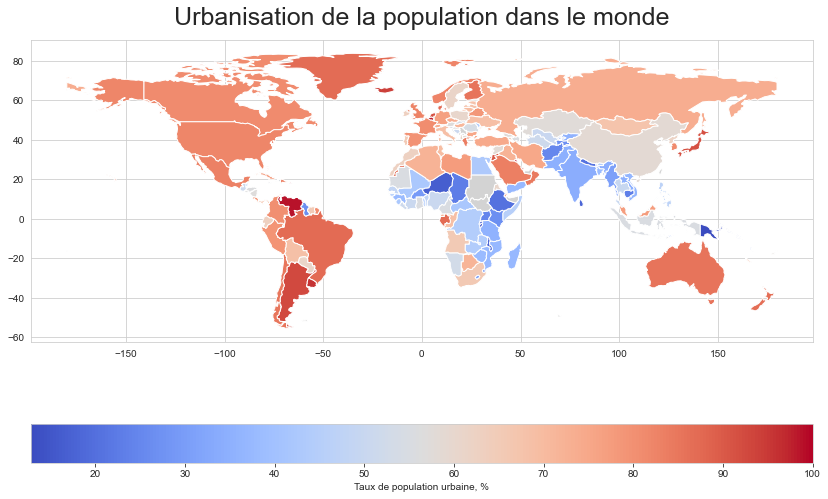

In [277]:
fig, ax = plt.subplots(1, 1, figsize=(14,10))

tab_world.plot(column='urb pop 2018, %', cmap='coolwarm', missing_kwds={'color': 'lightgrey'},
            ax=ax,
            legend=True,
            legend_kwds={'label': "Taux de population urbaine, %", 'orientation': "horizontal"})
plt.title("Urbanisation de la population dans le monde", fontdict={"fontsize": "25", "fontweight" : "3"}, pad = 15)

plt.savefig("map_urbanisation.jpg")

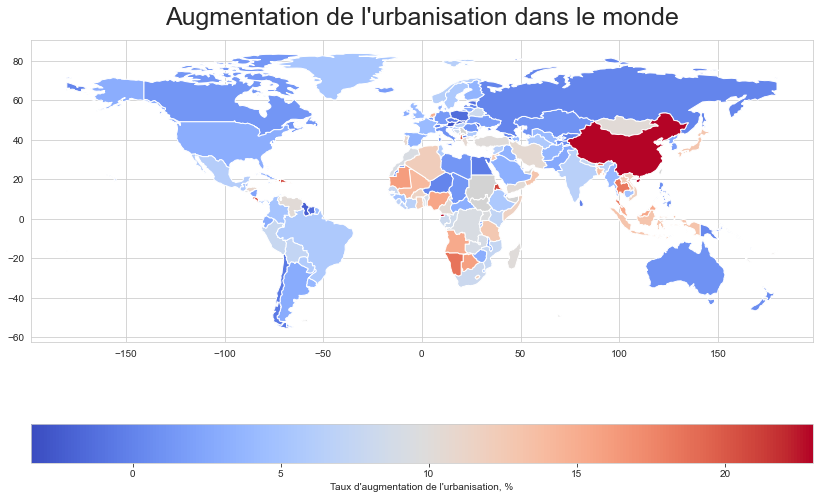

In [278]:
fig, ax = plt.subplots(1, 1, figsize=(14,10))

tab_world.plot(column='urb pop change, %', cmap='coolwarm', missing_kwds={'color': 'lightgrey'},
            ax=ax,
            legend=True,
            legend_kwds={'label': "Taux d'augmentation de l'urbanisation, %", 'orientation': "horizontal"})
plt.title("Augmentation de l'urbanisation dans le monde", fontdict={"fontsize": "25", "fontweight" : "3"}, pad = 15)

plt.savefig("map_urbanisation_increase.jpg")

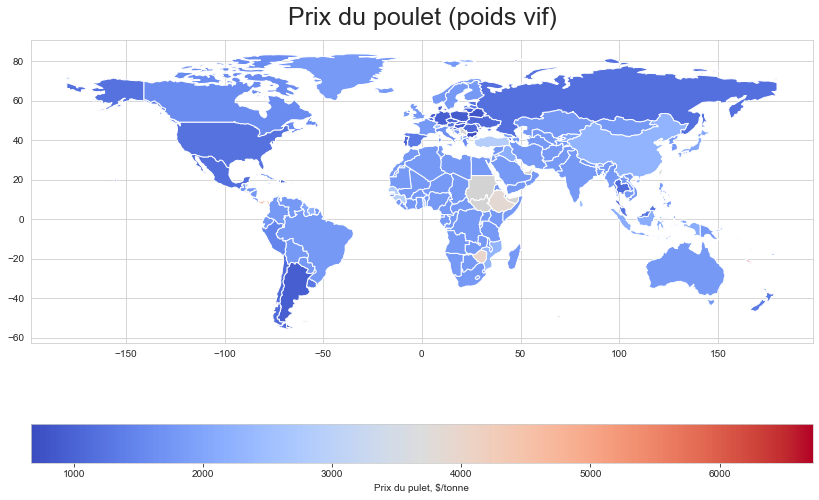

In [279]:
fig, ax = plt.subplots(1, 1, figsize=(14,10))

tab_world.plot(column='chicken 2017, $/t', cmap='coolwarm', missing_kwds={'color': 'lightgrey'},
            ax=ax,
            legend=True,
            legend_kwds={'label': "Prix du pulet, $/tonne", 'orientation': "horizontal"})
plt.title("Prix du poulet (poids vif)", fontdict={"fontsize": "25", "fontweight" : "3"}, pad = 15)

plt.savefig("map_chicken_prise.jpg")

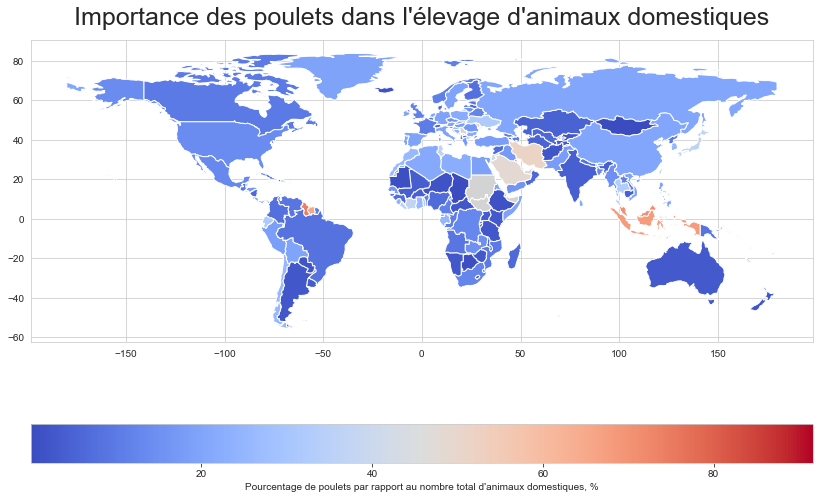

In [280]:
fig, ax = plt.subplots(1, 1, figsize=(14,10))

tab_world.plot(column='% total UGB', cmap='coolwarm', missing_kwds={'color': 'lightgrey'},
            ax=ax,
            legend=True,
            legend_kwds={'label': "Pourcentage de poulets par rapport au nombre total d'animaux domestiques, %", 'orientation': "horizontal"})
plt.title("Importance des poulets dans l'élevage d'animaux domestiques", fontdict={"fontsize": "25", "fontweight" : "3"}, pad = 15)

plt.savefig("map_chicken_importance.jpg")

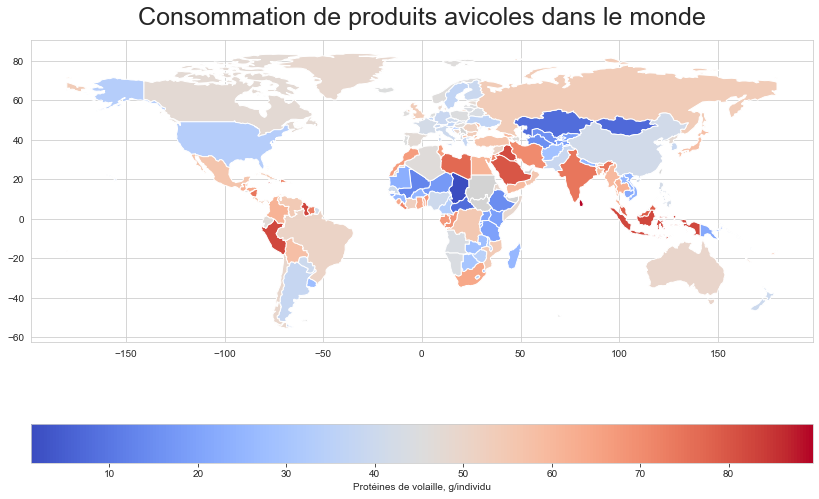

In [281]:
fig, ax = plt.subplots(1, 1, figsize=(14,10))

tab_world.plot(column='poultry prot/pers, %', cmap='coolwarm', missing_kwds={'color': 'lightgrey'},
            ax=ax,
            legend=True,
            legend_kwds={'label': "Protéines de volaille, g/individu", 'orientation': "horizontal"})
plt.title("Consommation de produits avicoles dans le monde", fontdict={"fontsize": "25", "fontweight" : "3"}, pad = 15)

plt.savefig("map_chicken_consumption.jpg")

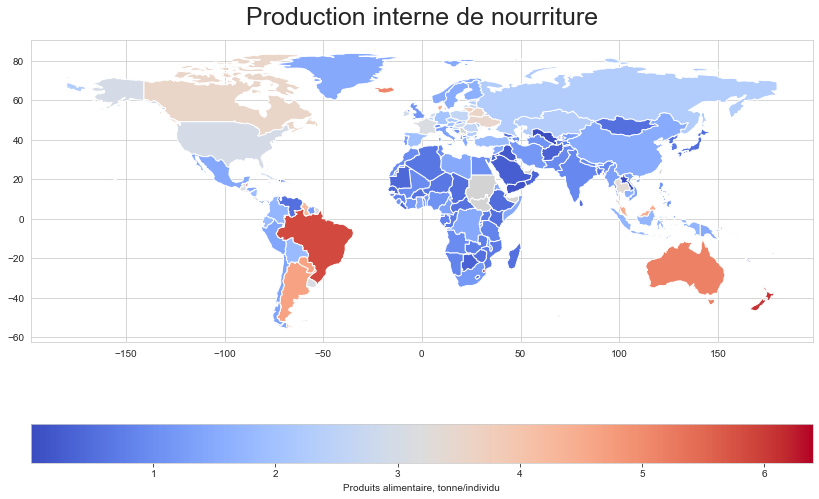

In [282]:
fig, ax = plt.subplots(1, 1, figsize=(14,10))

tab_world.plot(column='product/pers, t', cmap='coolwarm', missing_kwds={'color': 'lightgrey'},
            ax=ax,
            legend=True,
            legend_kwds={'label': "Produits alimentaire, tonne/individu", 'orientation': "horizontal"})
plt.title("Production interne de nourriture", fontdict={"fontsize": "25", "fontweight" : "3"}, pad = 15)

plt.savefig("map_food_production.jpg")